# Name - Jatin Patel
# The Sparks Foundation
# Data Science and Bussiness Analytics task # 6 - Predictions using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris       

In [2]:
iris = load_iris()      #Load the Iris dataset.

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names  

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data       # Refer to the data, which happens to be in the form of a 2-dimensional numpy array.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
#Construct a dataframe using the 2D array as data.
df = pd.DataFrame(data = iris.data, columns = iris.feature_names) 
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [7]:
#Add a new feature - 'target', on axis = 'columns'
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2

In [10]:
#The numbers 0, 1, 2 in the target feature, represent the three classes of the flower_name. 
df[df.target==2].head()  

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [11]:
#A new feature that maps the target value to the target_names.
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [12]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [13]:
%matplotlib inline

# Visualizations 

In [14]:
#Separtating the classes into three separate individual dataframes.
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]
df_2 = df[df['target'] == 2]

In [15]:
df_2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target flower_name  
100       2   virginica  
101       2   virginica  
102       2   virginica  
103       2   virginica  
104       2   virginica

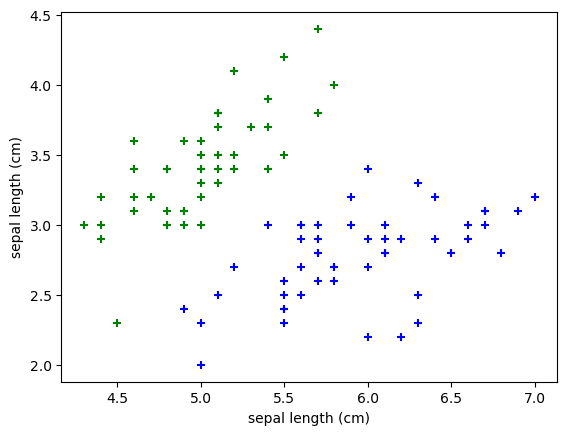

In [16]:
#Generating a scatterplot to compare the sepal length with sepal width, of the first two classes.

plt.scatter(x = df_0['sepal length (cm)'], 
            y = df_0['sepal width (cm)'],
            color = 'green',
            marker = '+')

plt.scatter(x = df_1['sepal length (cm)'], 
            y = df_1['sepal width (cm)'],
            color = 'blue',
            marker = '+')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')

plt.show()


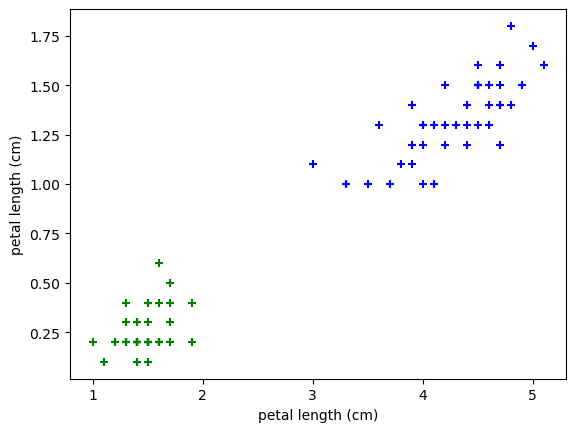

In [17]:
#Generating a scatter plot to compare the petal length with petal width, of the first two classes.

plt.scatter(x = df_0['petal length (cm)'], 
            y = df_0['petal width (cm)'],
            color = 'green',
            marker = '+')

plt.scatter(x = df_1['petal length (cm)'], 
            y = df_1['petal width (cm)'],
            color = 'blue',
            marker = '+')

plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()


# Predictors and Target.

In [18]:
y = df[['target', 'flower_name']]
y

target flower_name
0         0      setosa
1         0      setosa
2         0      setosa
3         0      setosa
4         0      setosa
..      ...         ...
145       2   virginica
146       2   virginica
147       2   virginica
148       2   virginica
149       2   virginica

[150 rows x 2 columns]

In [19]:
#Training Dataset.
X = df.drop(['target', 'flower_name'], axis = 1)

In [20]:
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [21]:
y = y.drop('target', axis = 1)
y.head()

flower_name
0      setosa
1      setosa
2      setosa
3      setosa
4      setosa

# Train-Test Split

In [22]:
#Performing Train-test split in the ratio 70-30%.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [23]:
len(X_train)

105

In [24]:
len(X_test)

45

# Model Training and Hyperparameter Tuning

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.9714285714285715
[1.         0.9047619  0.95238095 0.95238095 0.95238095]
Fold 1 Accuracy: 1.0


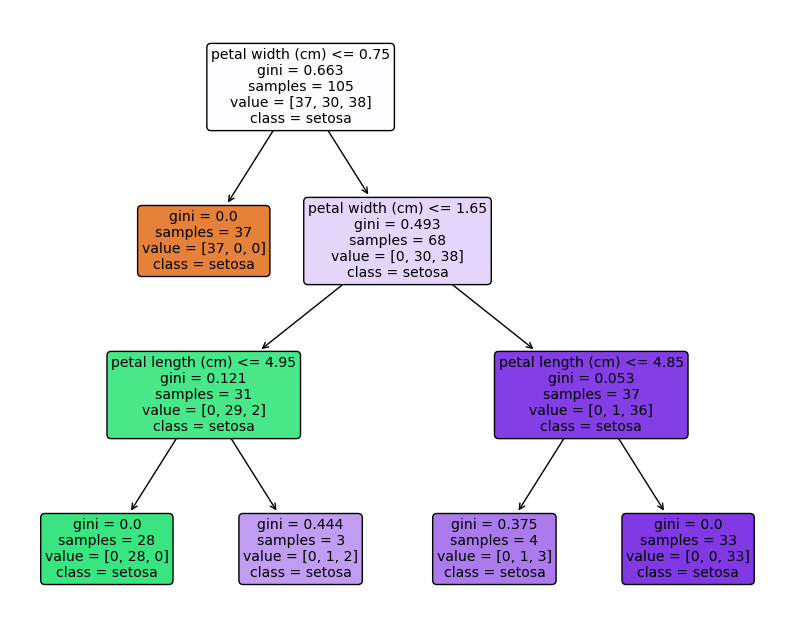

Fold 2 Accuracy: 0.9047619047619048


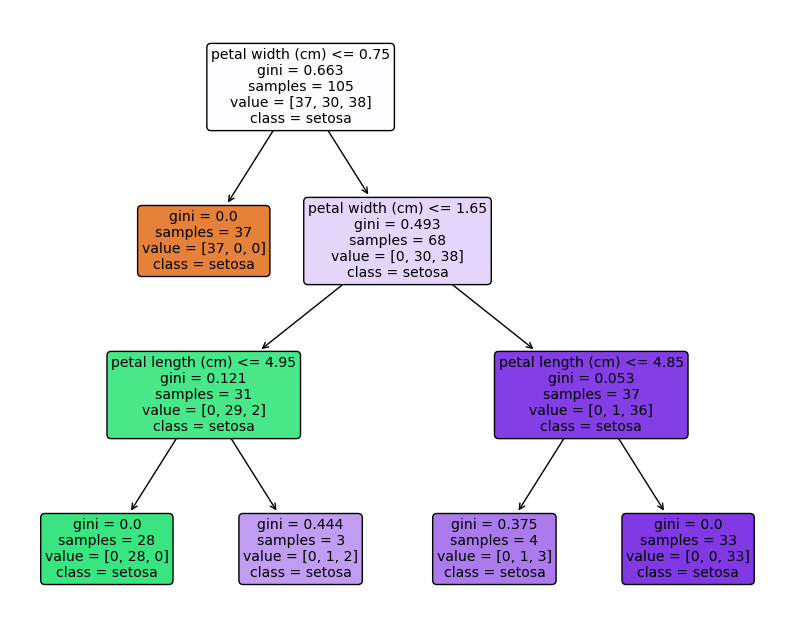

Fold 3 Accuracy: 0.9523809523809523


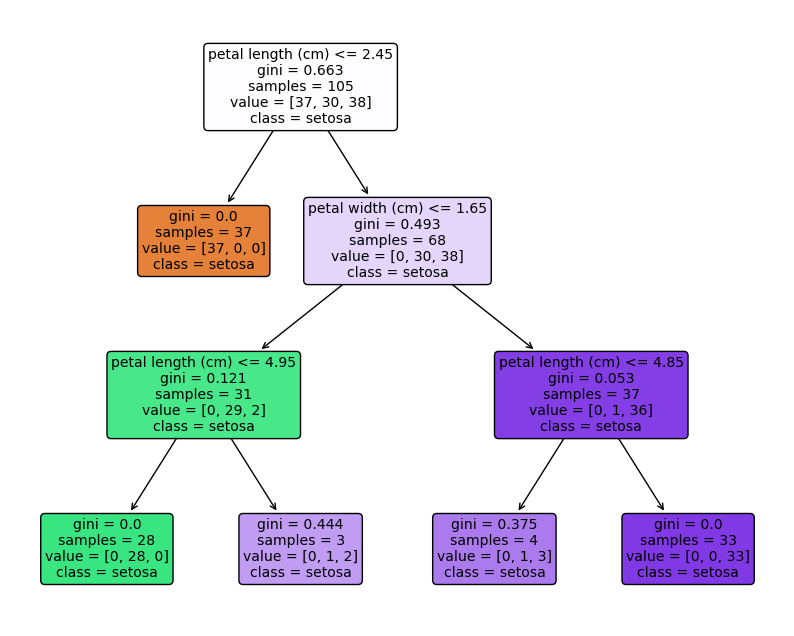

Fold 4 Accuracy: 0.9523809523809523


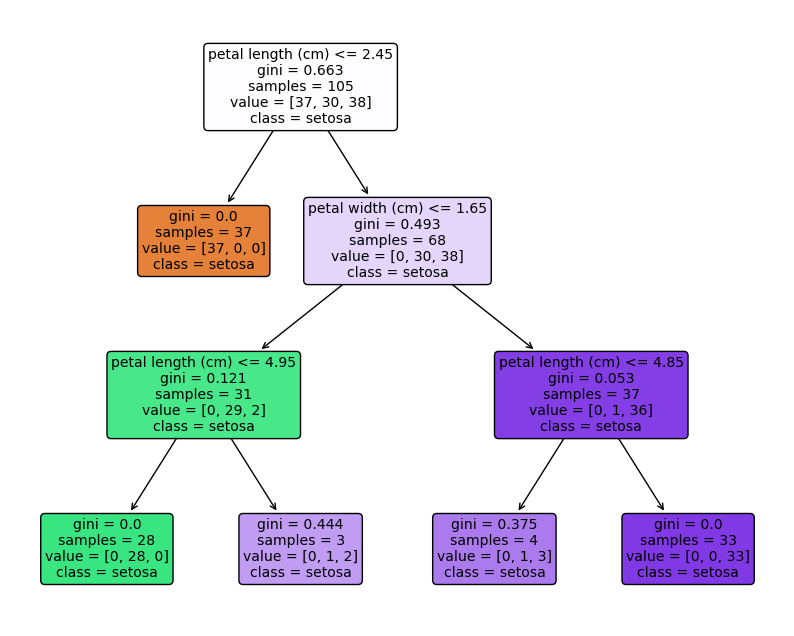

Fold 5 Accuracy: 0.9523809523809523


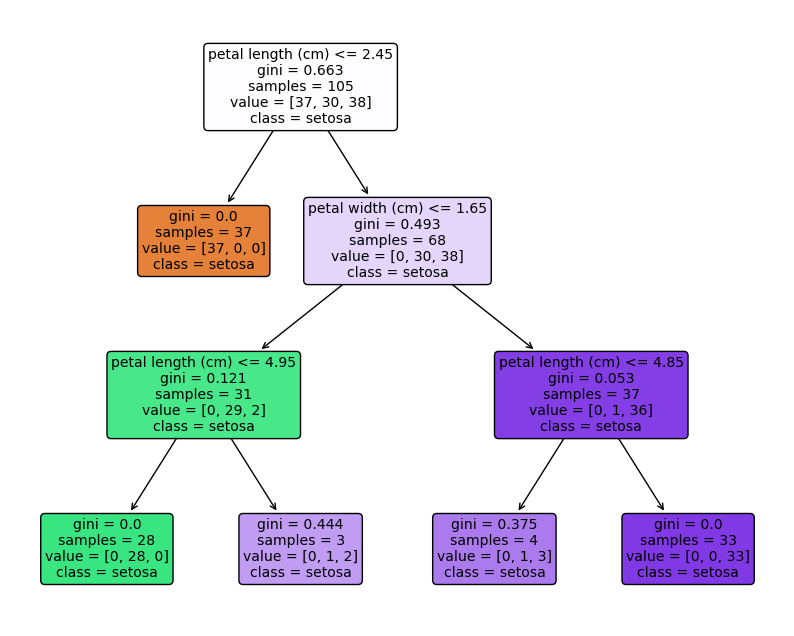

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score


#Initializing the parma_grid containing the combinations of hyperparameters, to train the model.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Classifier model
classifier = DecisionTreeClassifier()

#5-fold cross-validation for the trained models.
grid_search = GridSearchCV(classifier, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#Generating the best combination of hyperparameters corresponding to which the model performs the best and generates the
#highest accuracy across all folds.
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

cv_scores = cross_val_score(best_classifier, X_train, y_train, cv = 5)
print(cv_scores)
for fold_idx, score in enumerate(cv_scores, start = 1):
    print(f"Fold {fold_idx} Accuracy: {score}")

    # Train the classifier on the current fold
    best_classifier.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(10, 8))
    plot_tree(best_classifier, feature_names=df.columns, class_names=df.flower_name, filled=True, rounded=True)
    plt.show()

# Visualization of the Decision Tree obtained for every possible combination of the hyperparameters, along with the accuracy, and the hyperparameter combination.

Mean Accuracy:  0.9428571428571428


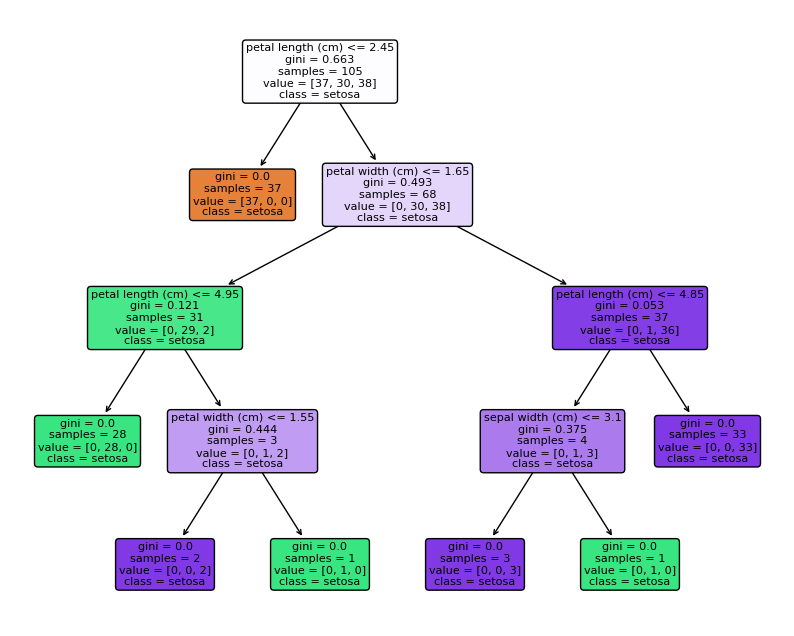

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


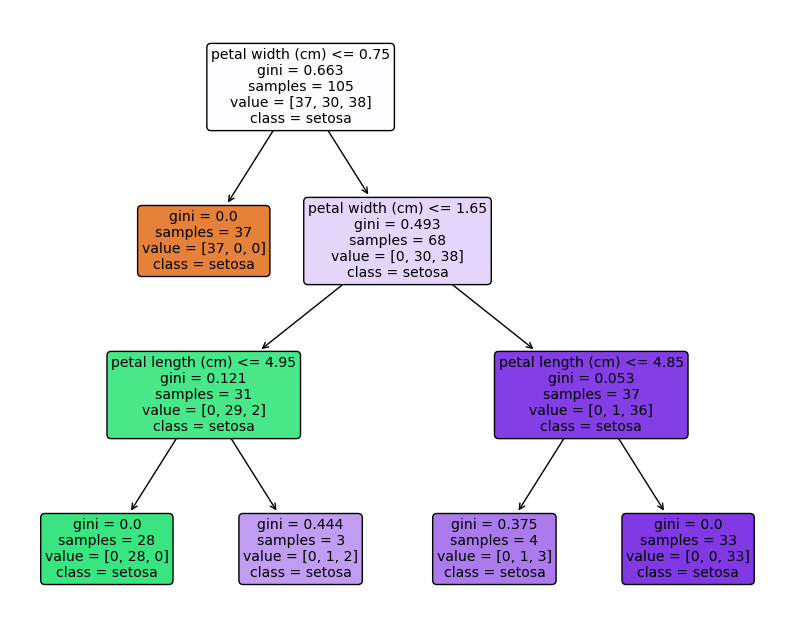

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


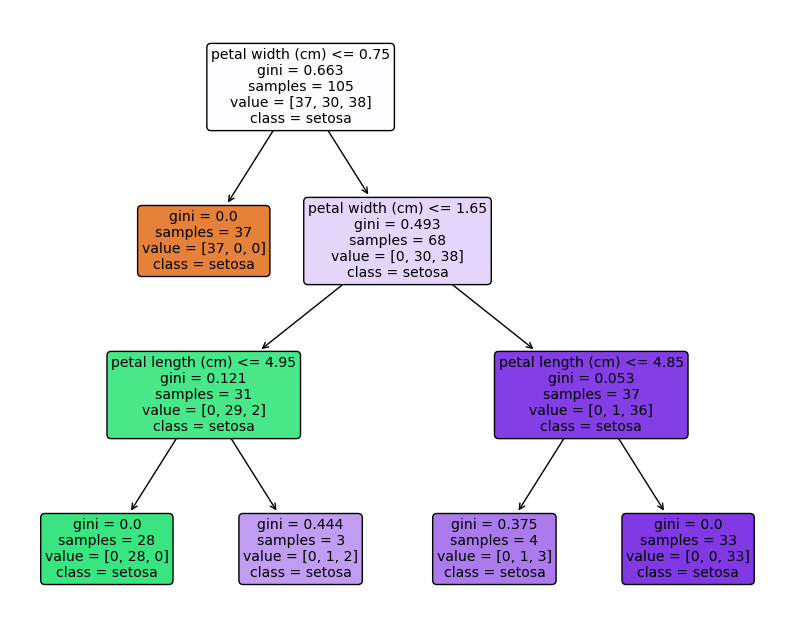

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


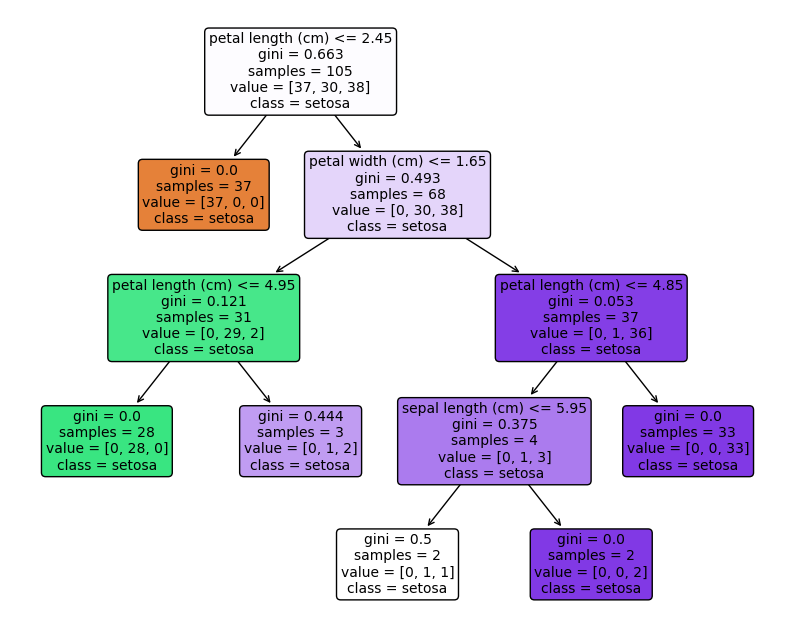

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


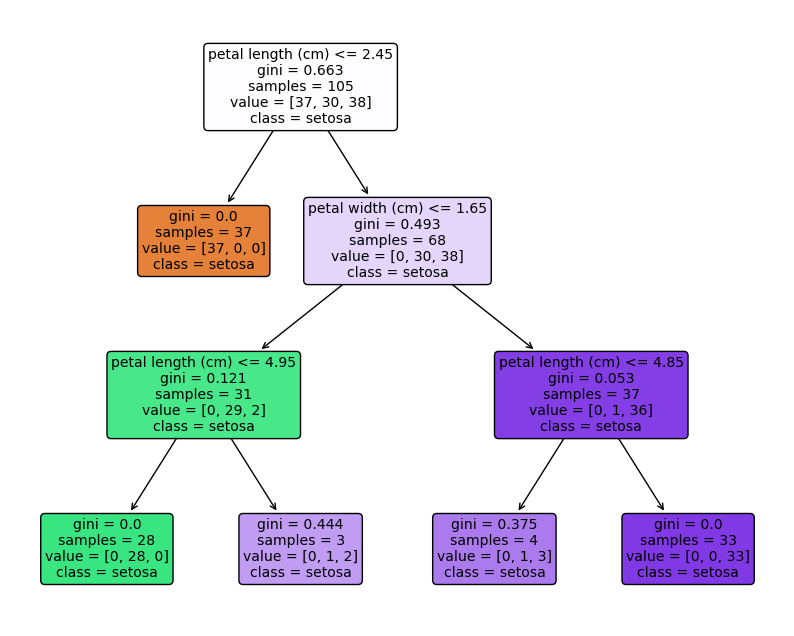

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


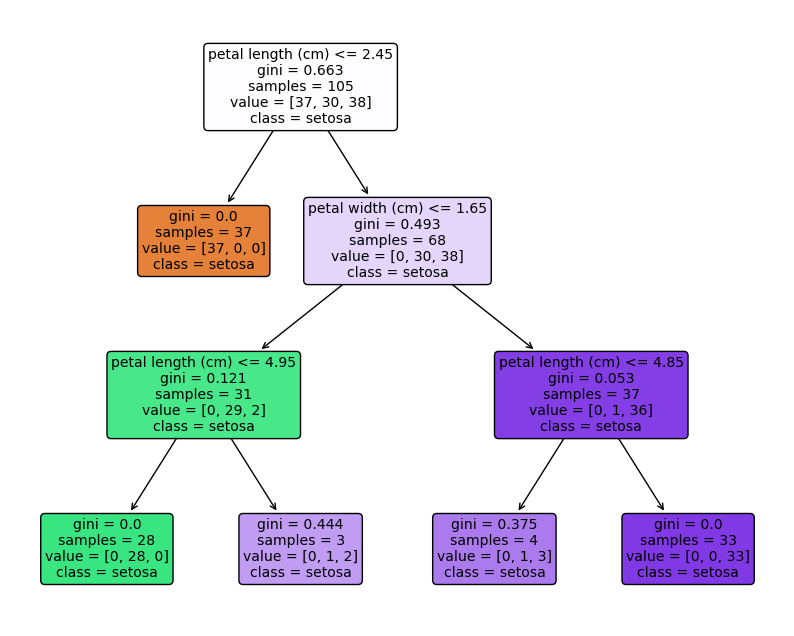

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


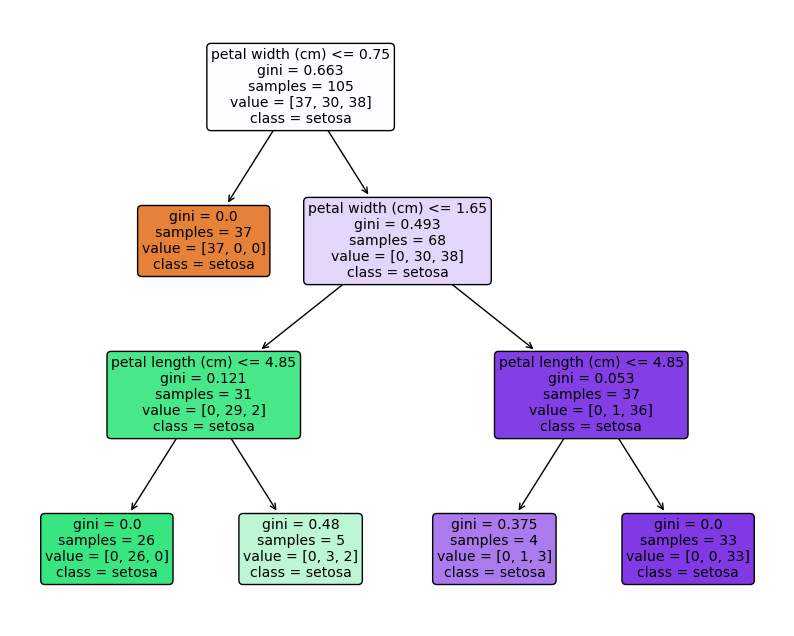

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


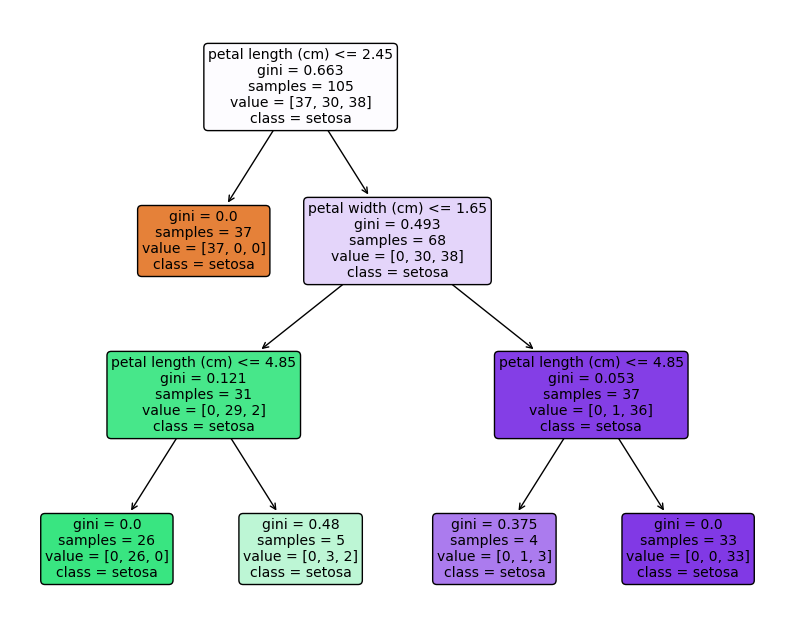

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


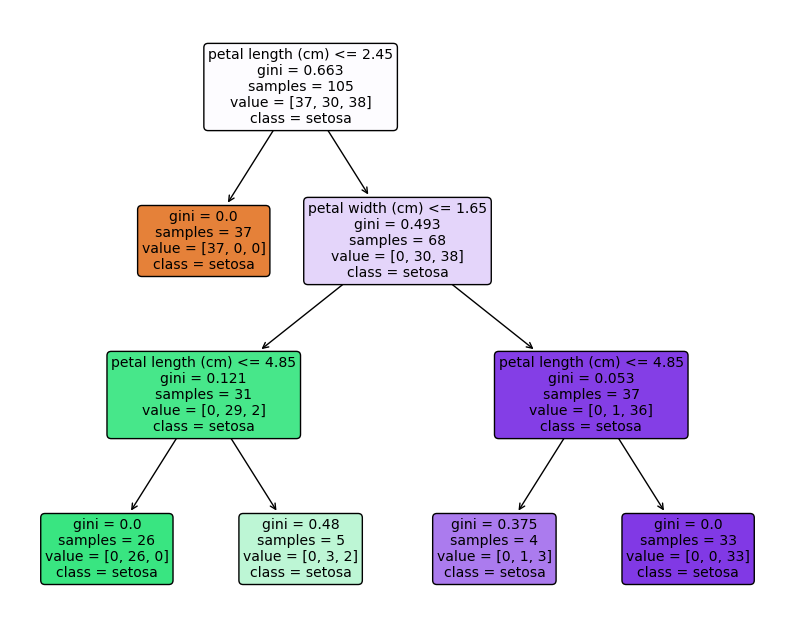

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9619047619047618


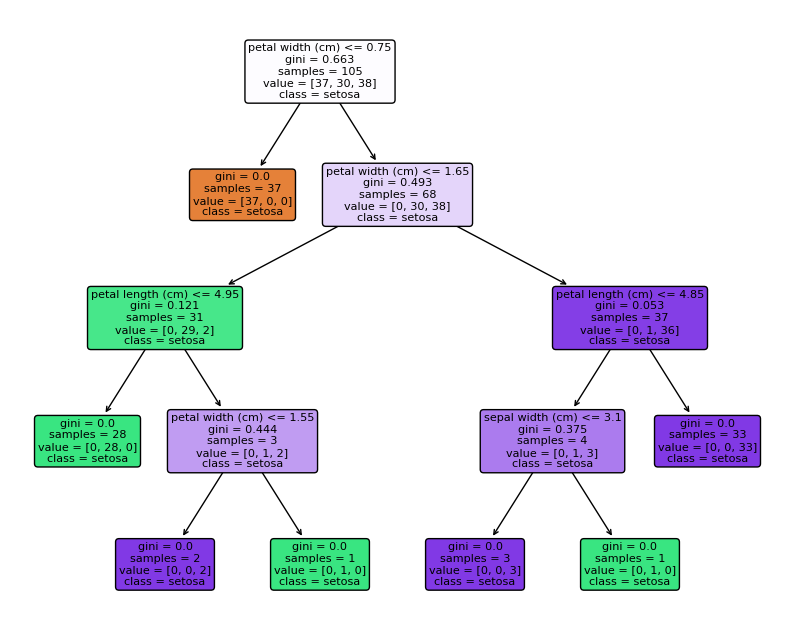

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


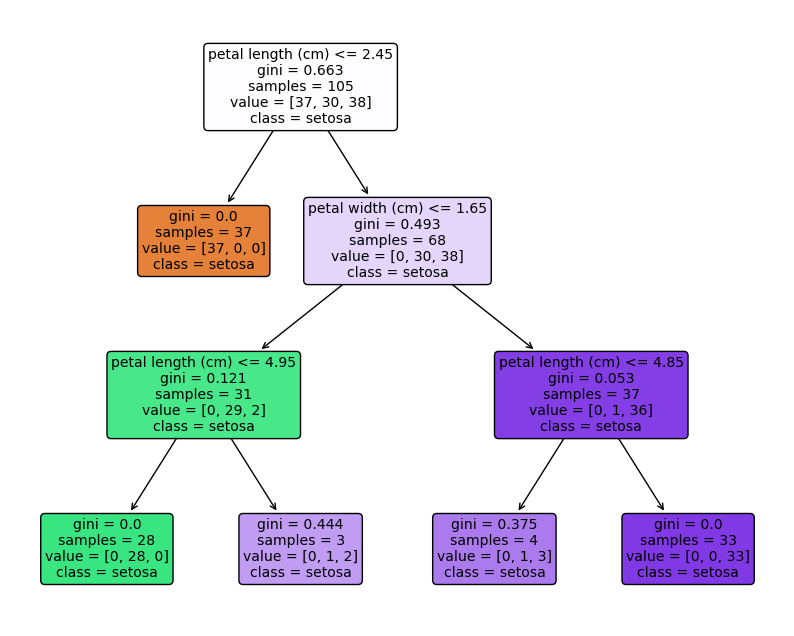

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


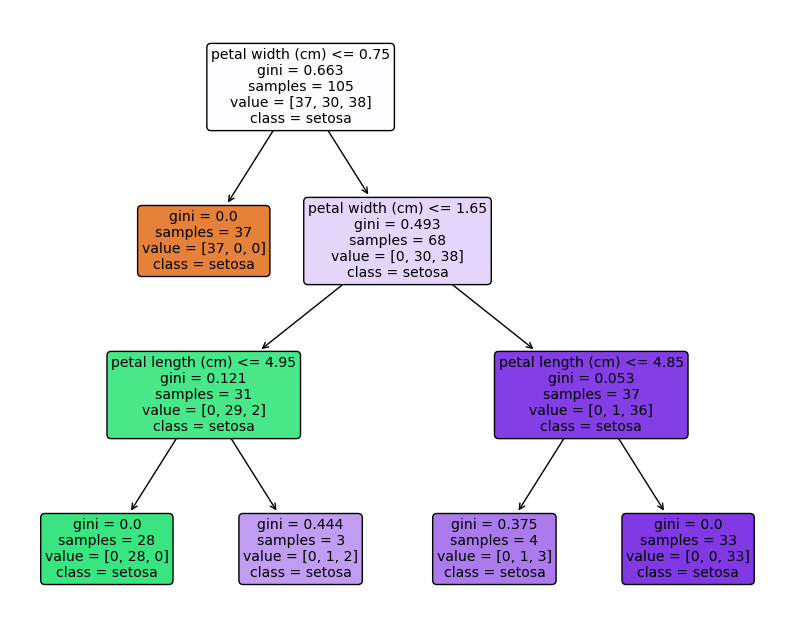

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9428571428571427


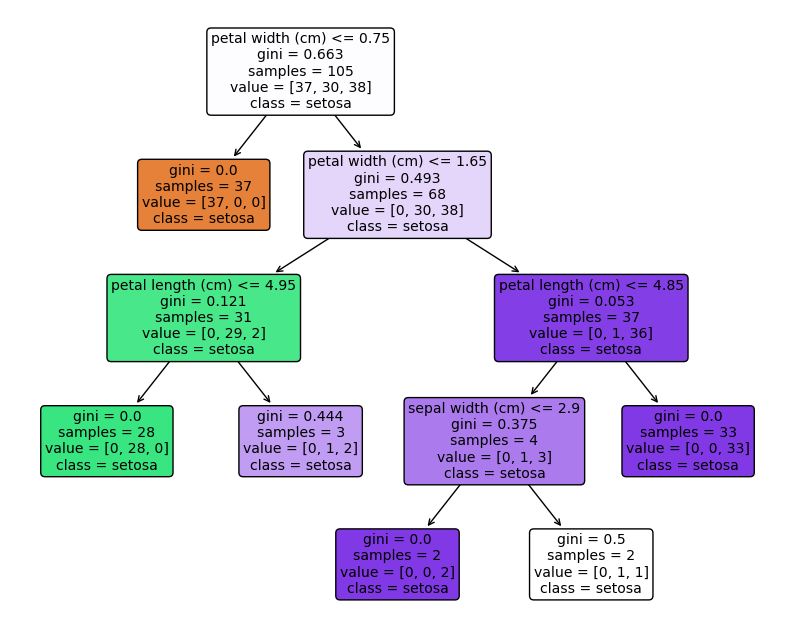

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


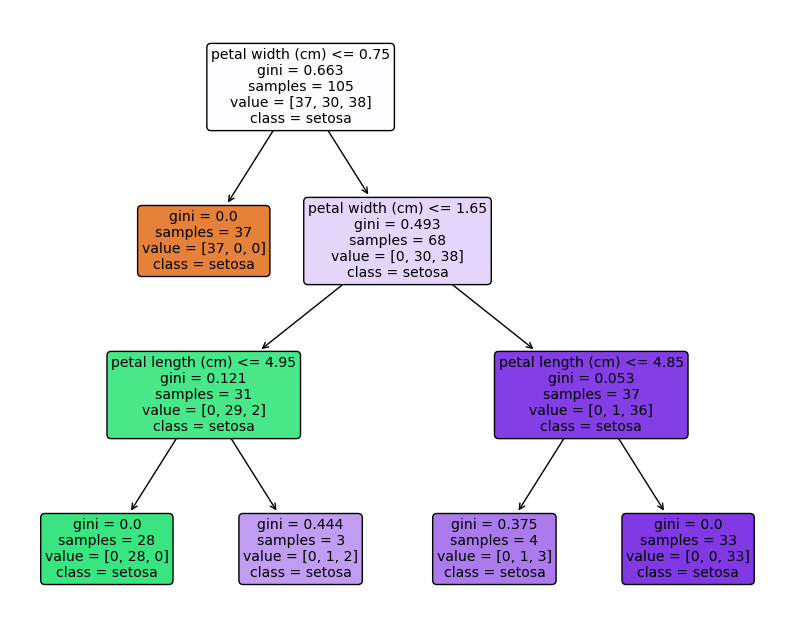

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


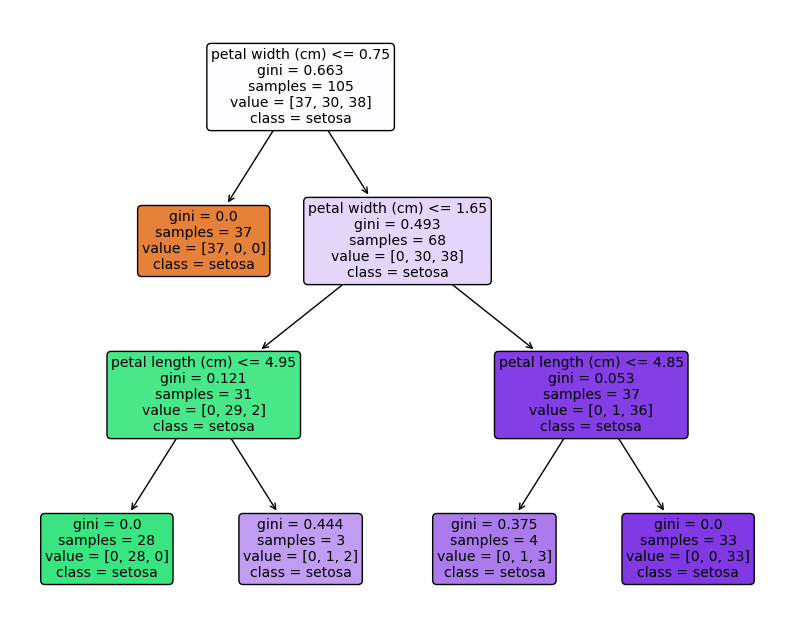

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


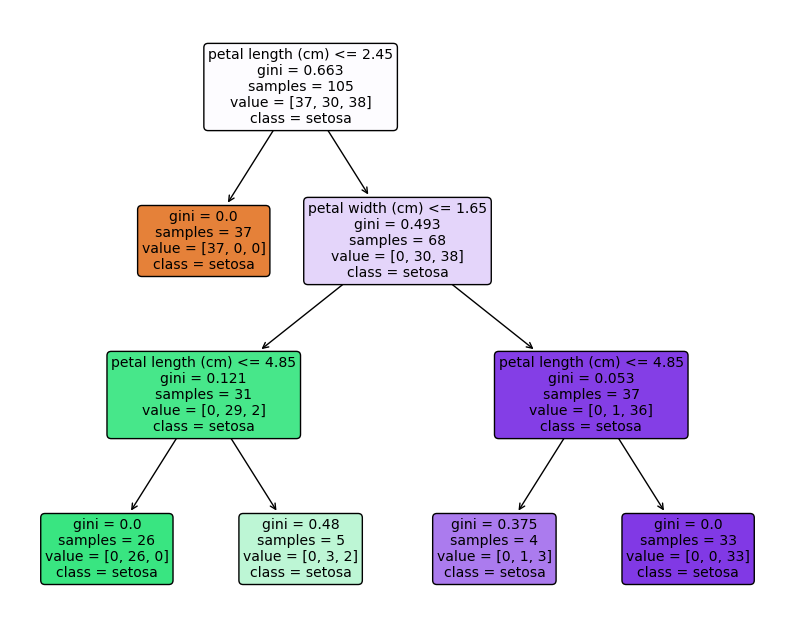

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


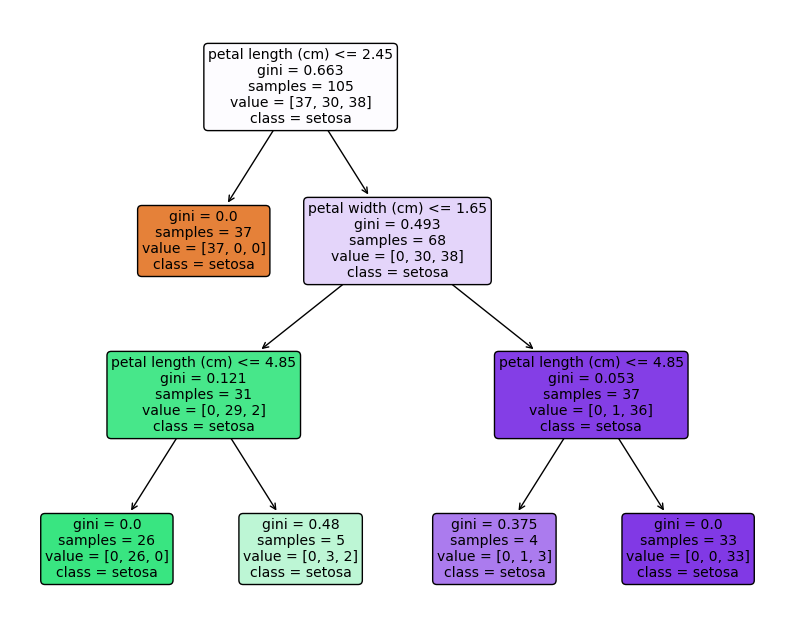

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


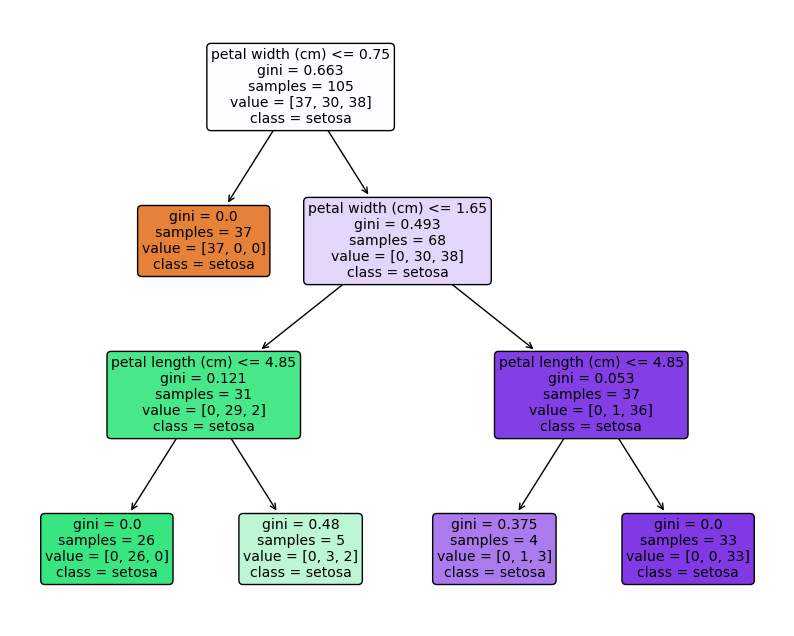

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


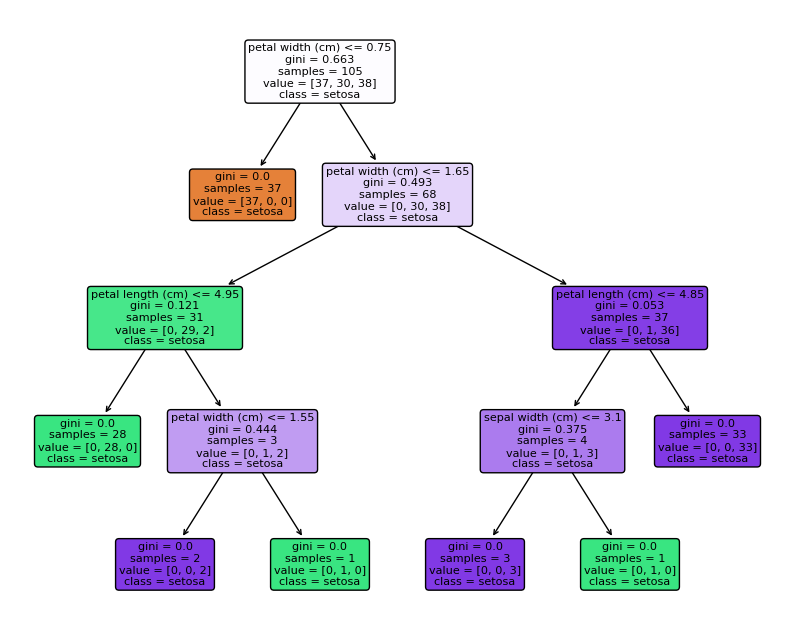

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


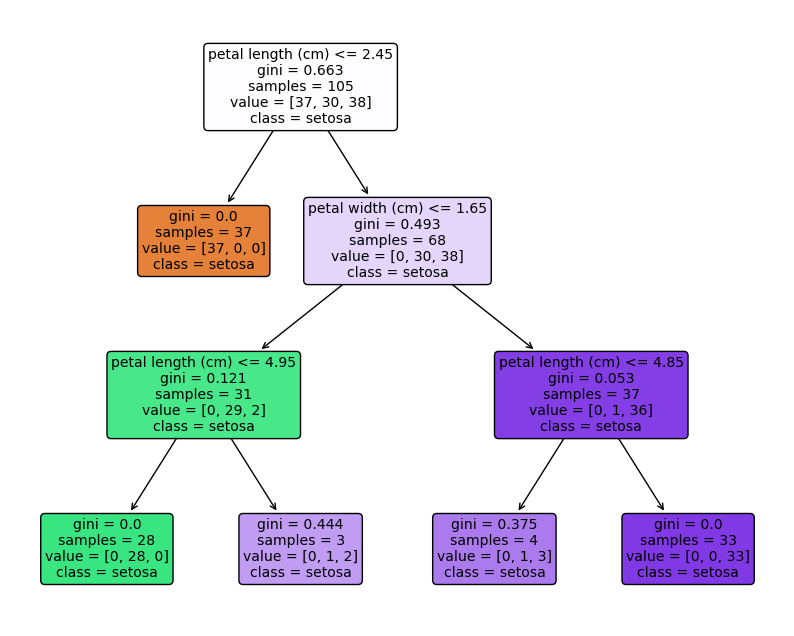

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


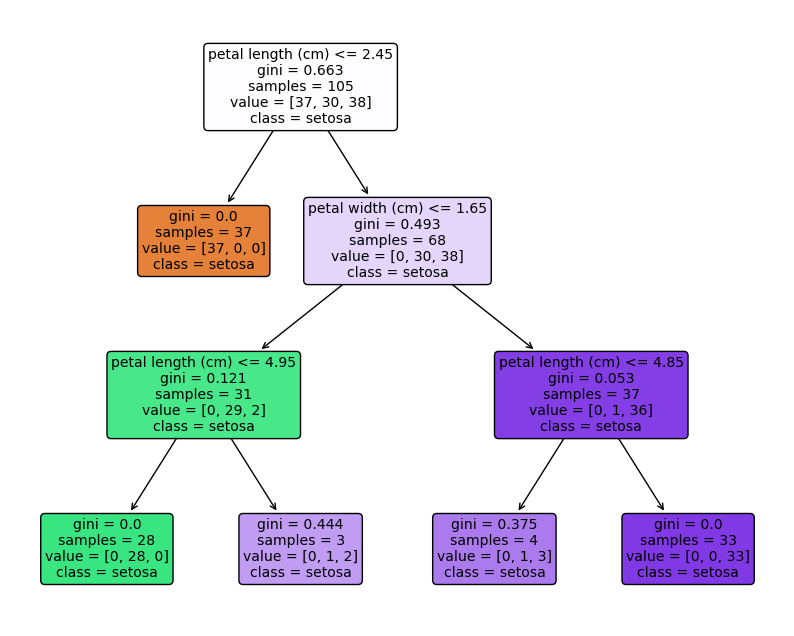

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


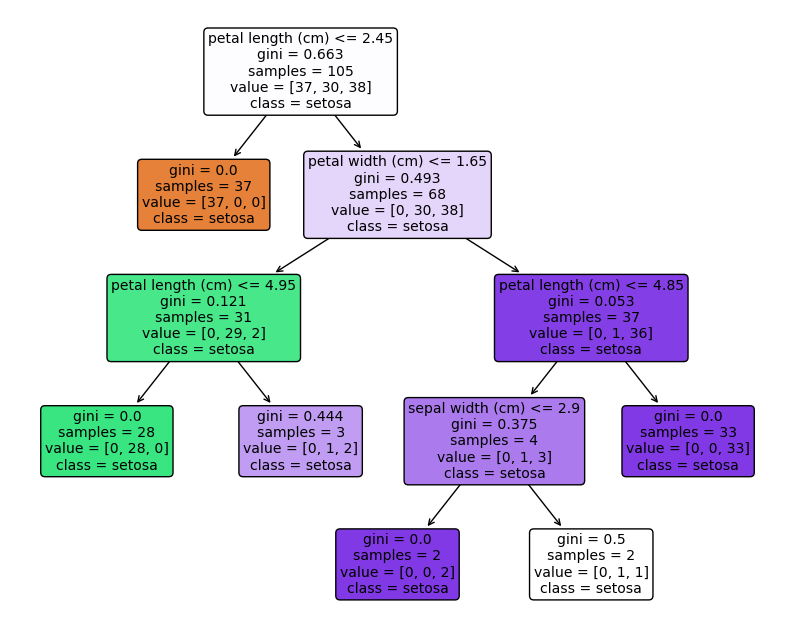

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


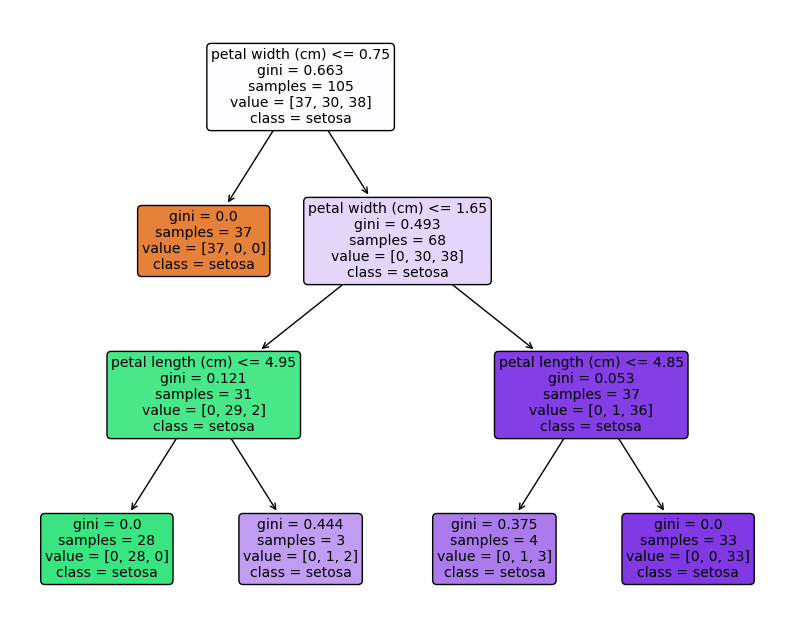

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


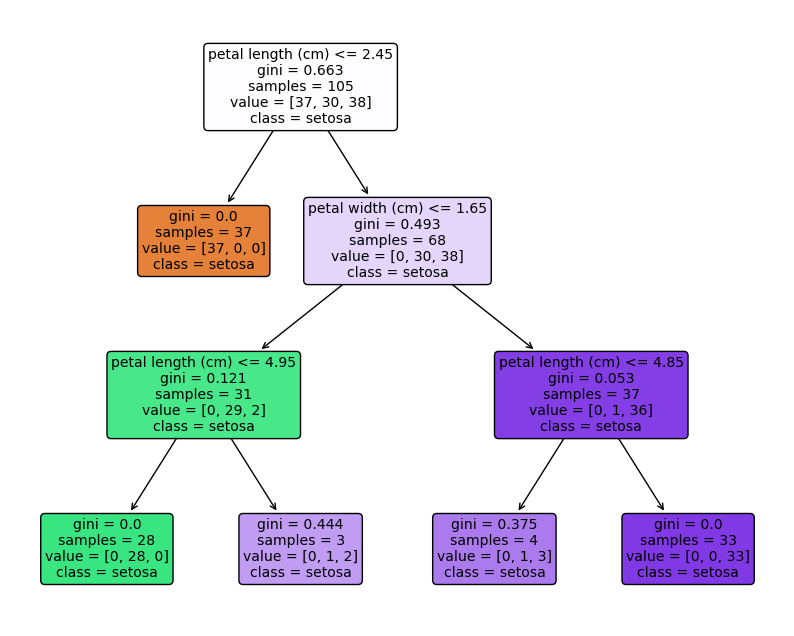

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


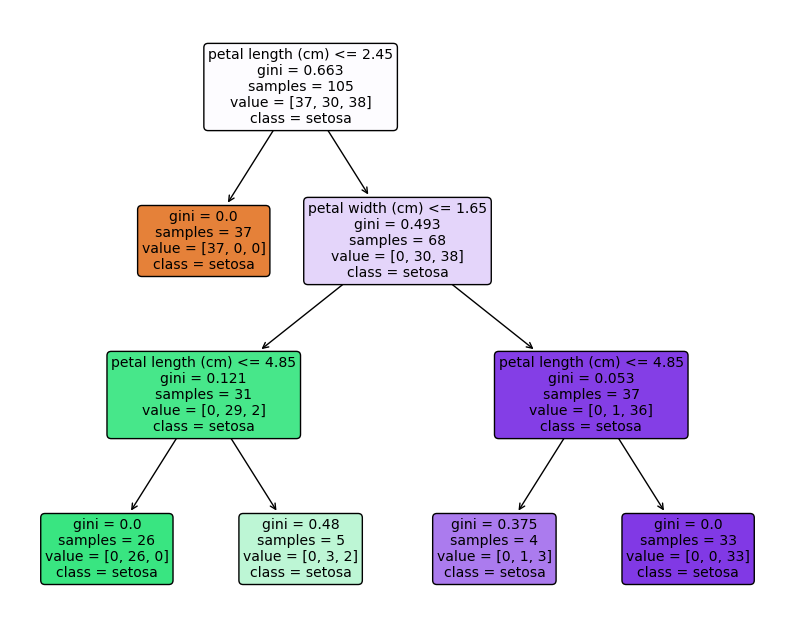

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


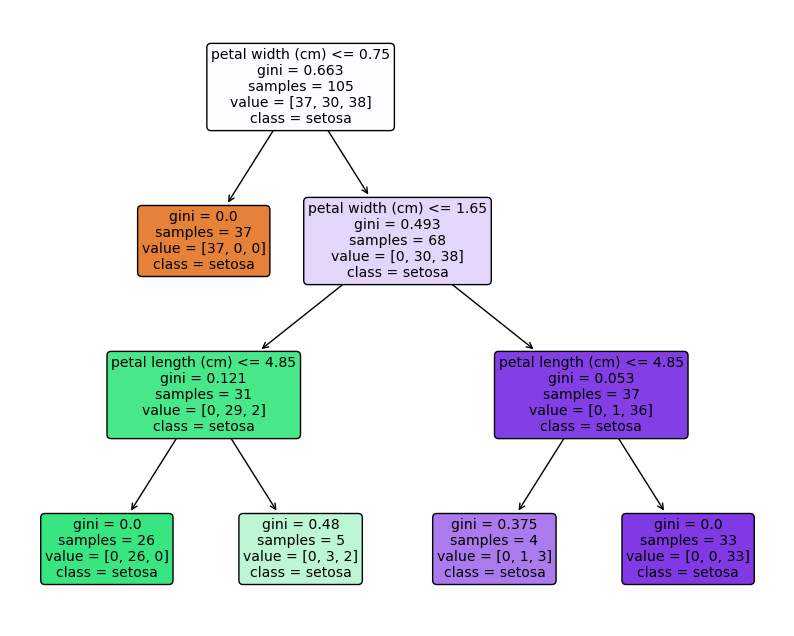

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


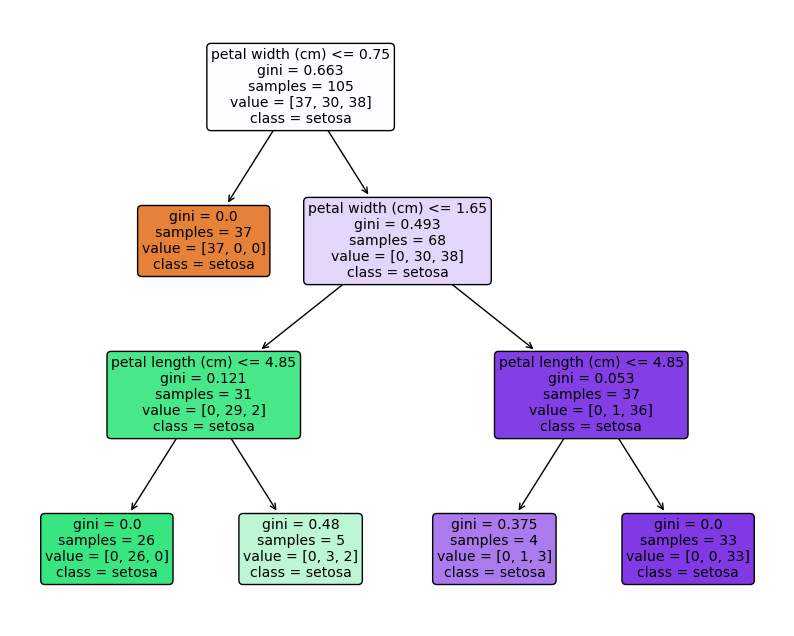

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


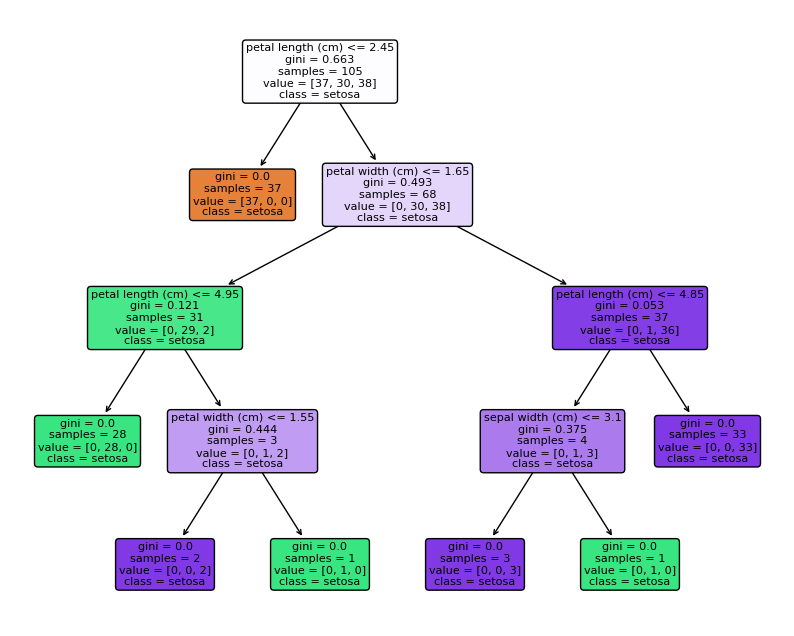

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


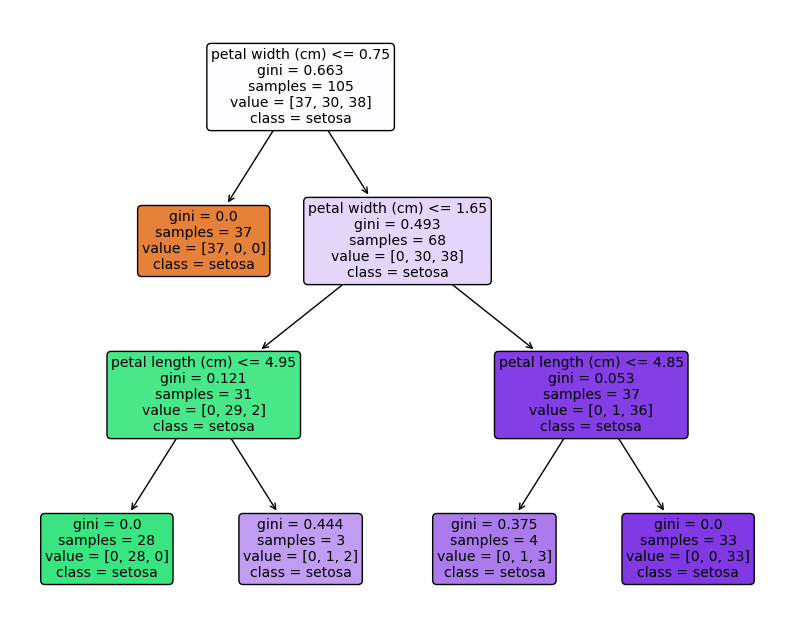

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


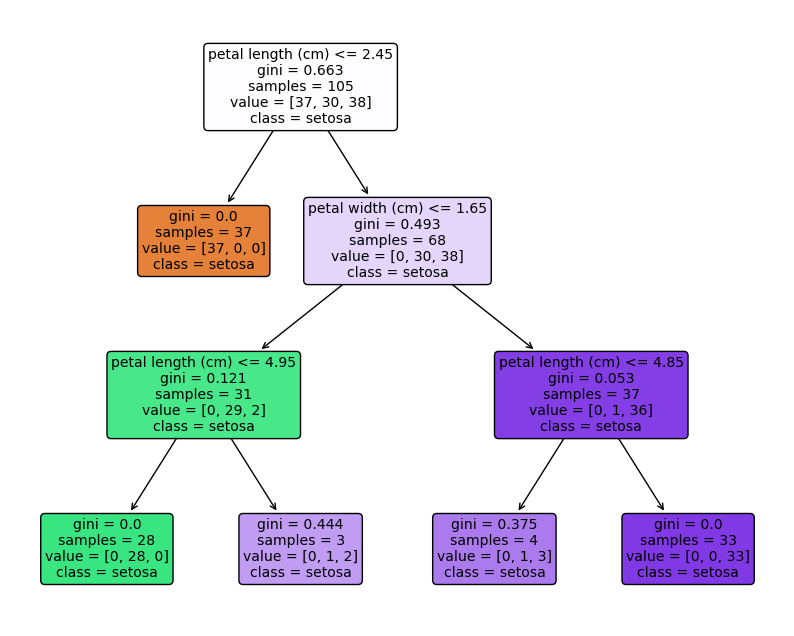

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9619047619047618


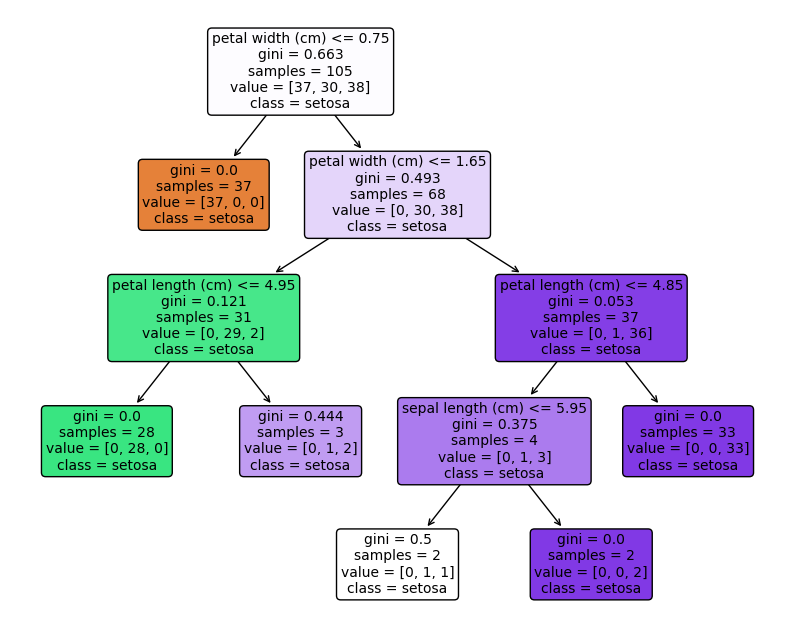

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


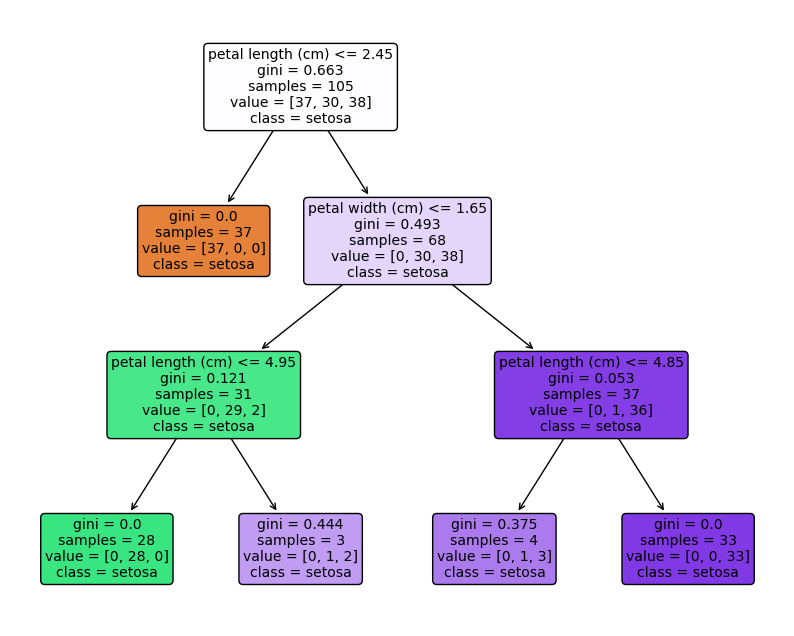

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


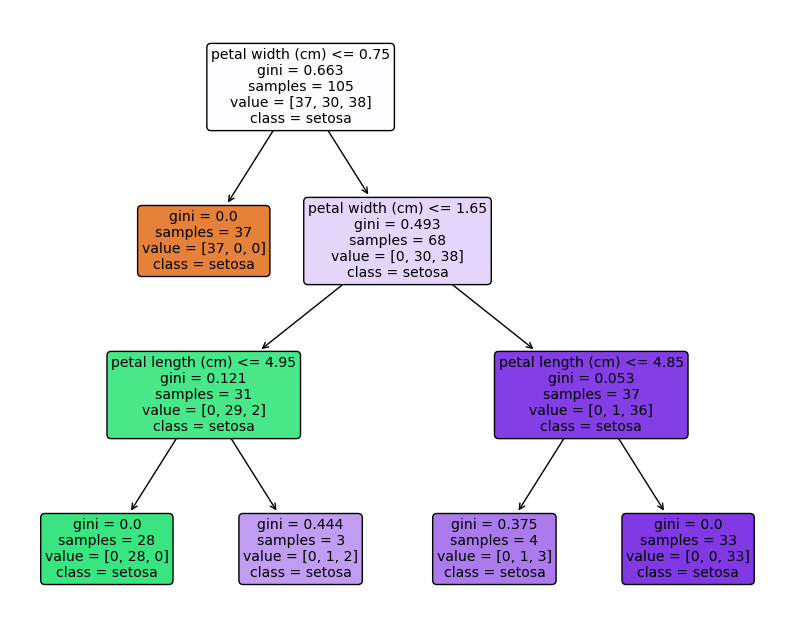

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


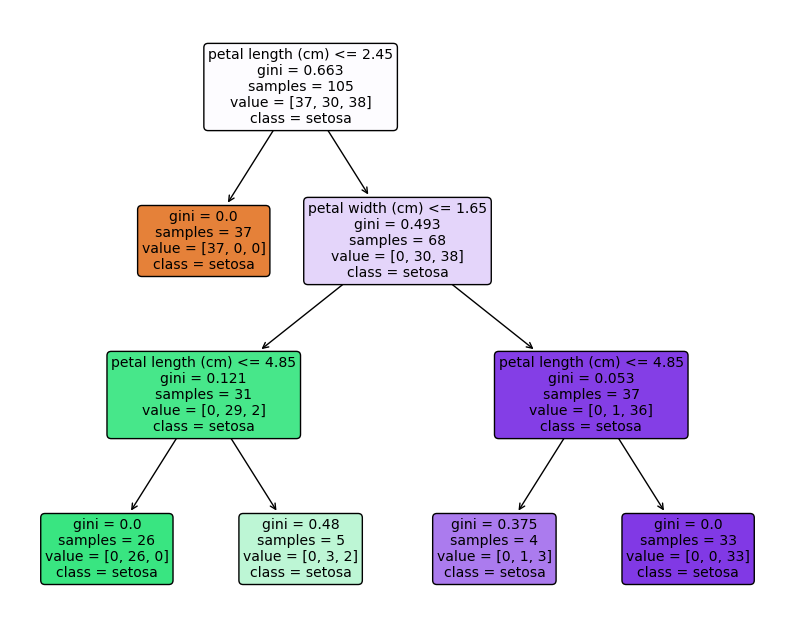

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


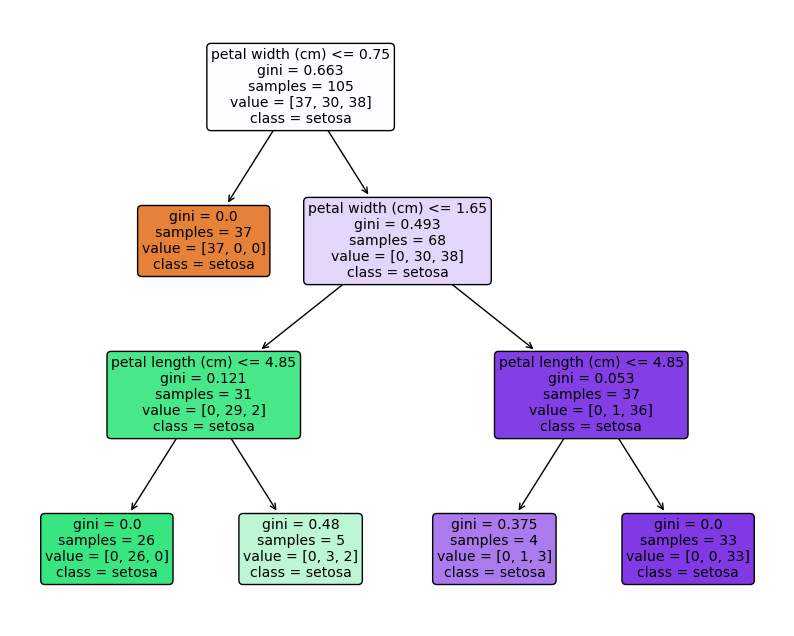

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


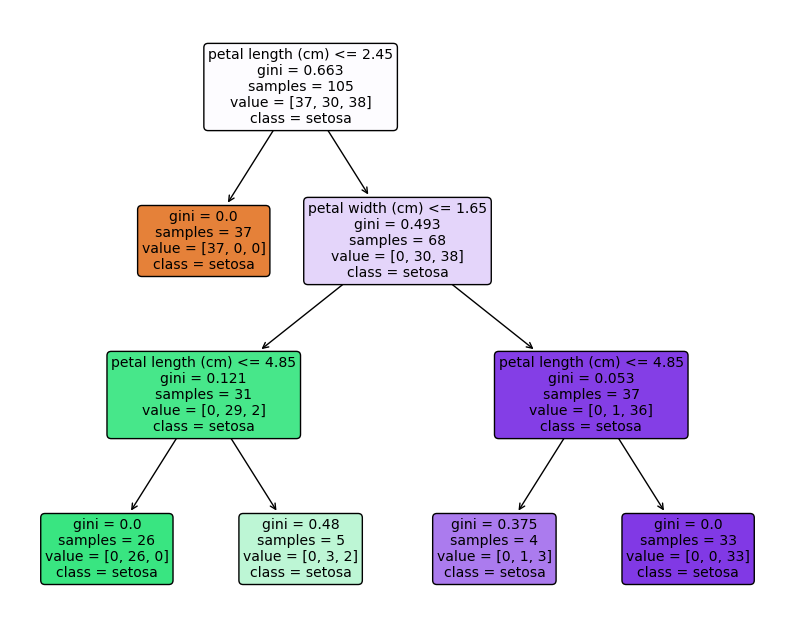

Current Hyperparameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


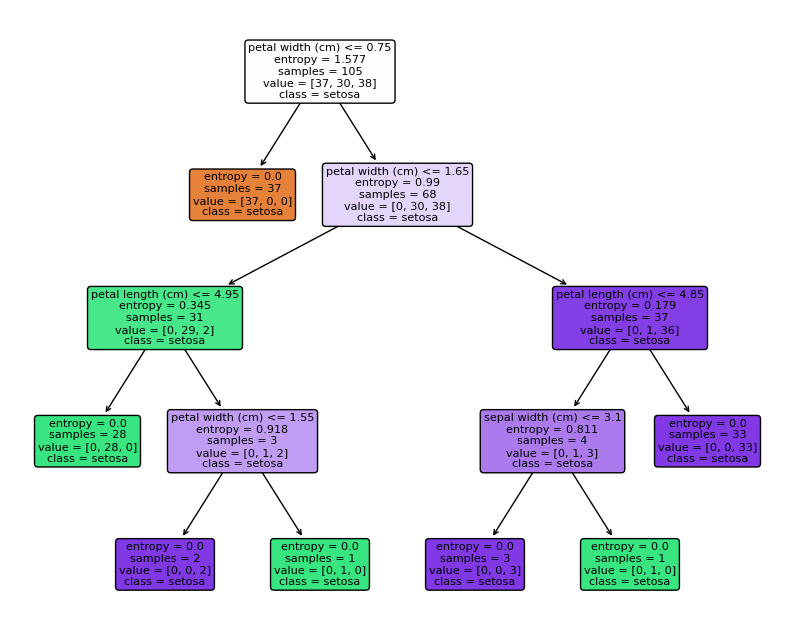

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


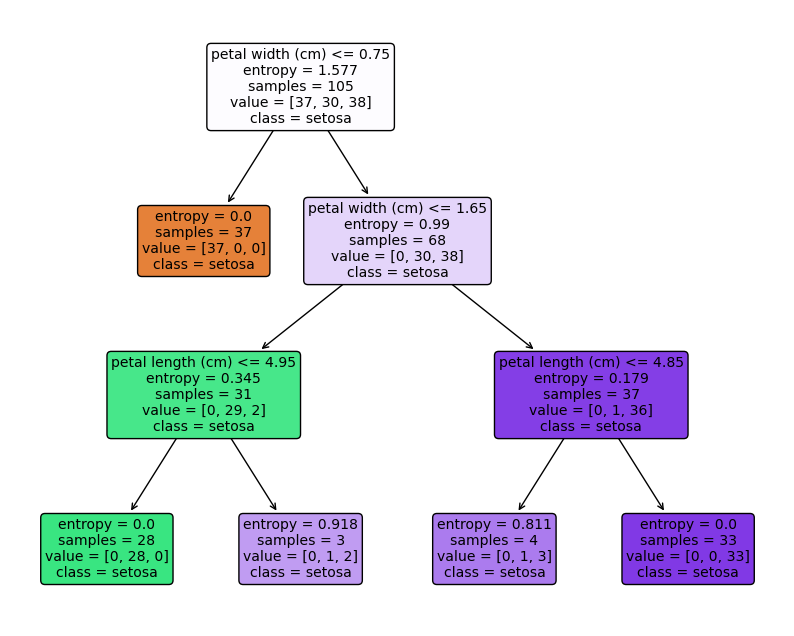

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9619047619047618


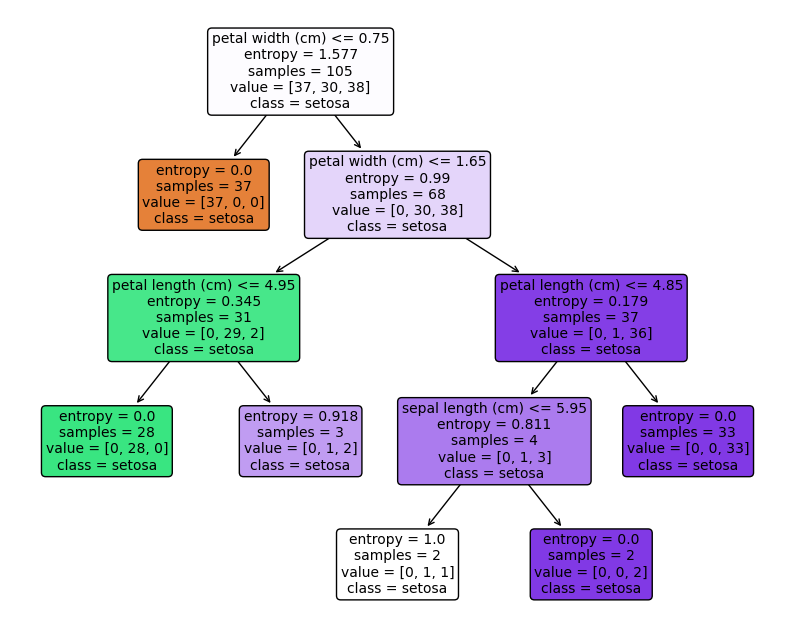

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


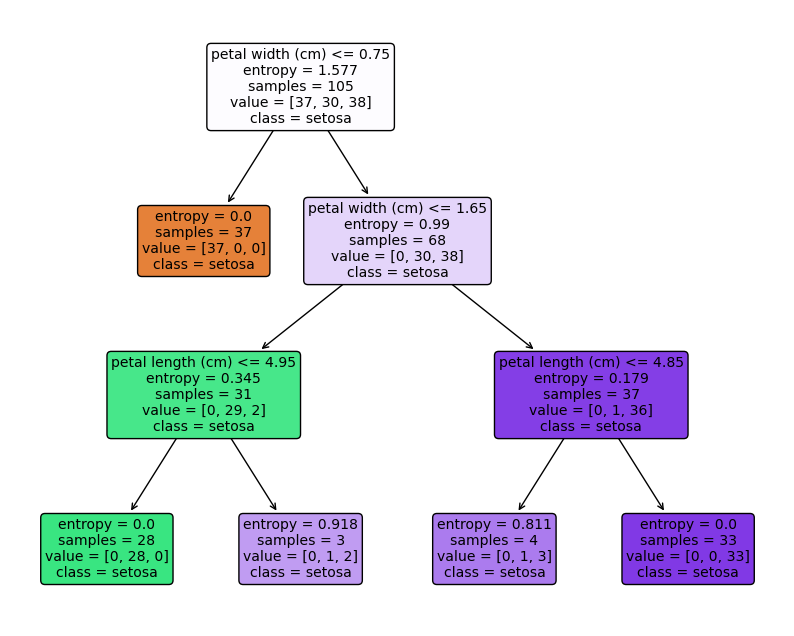

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


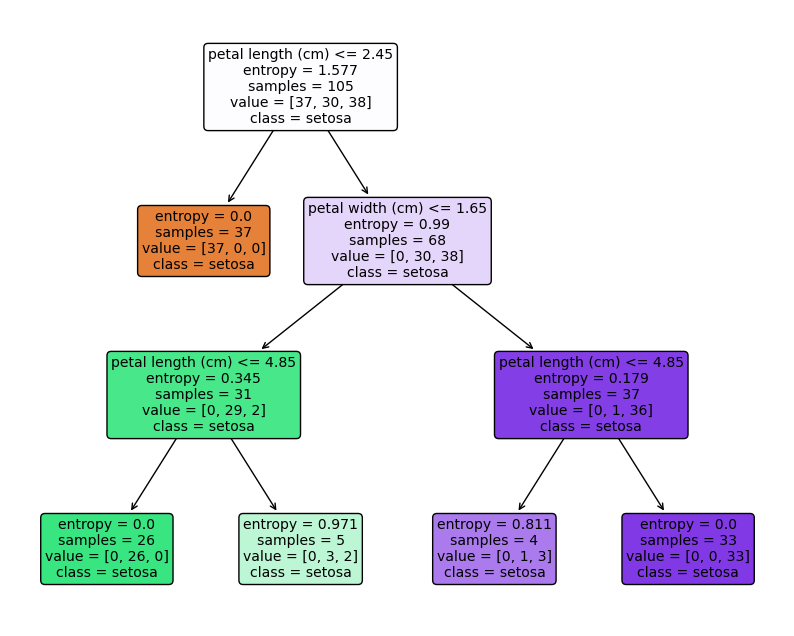

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


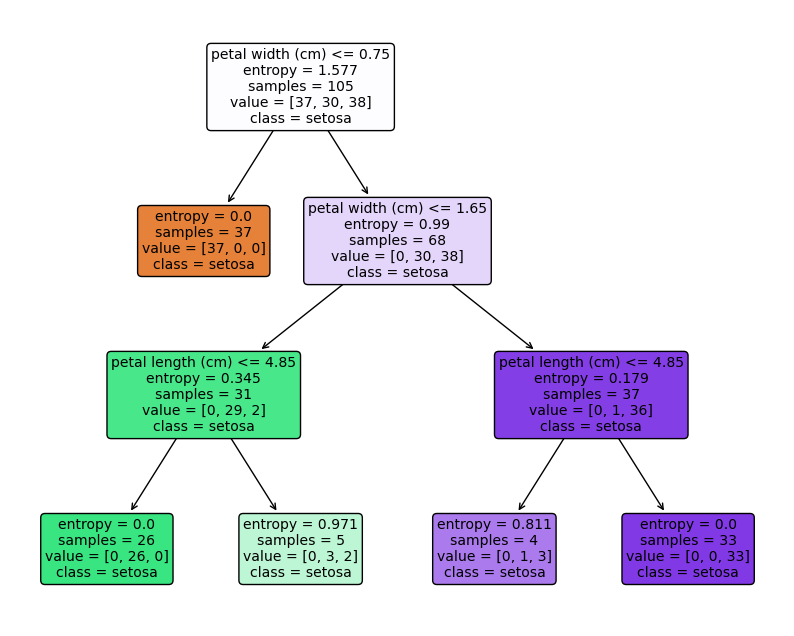

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


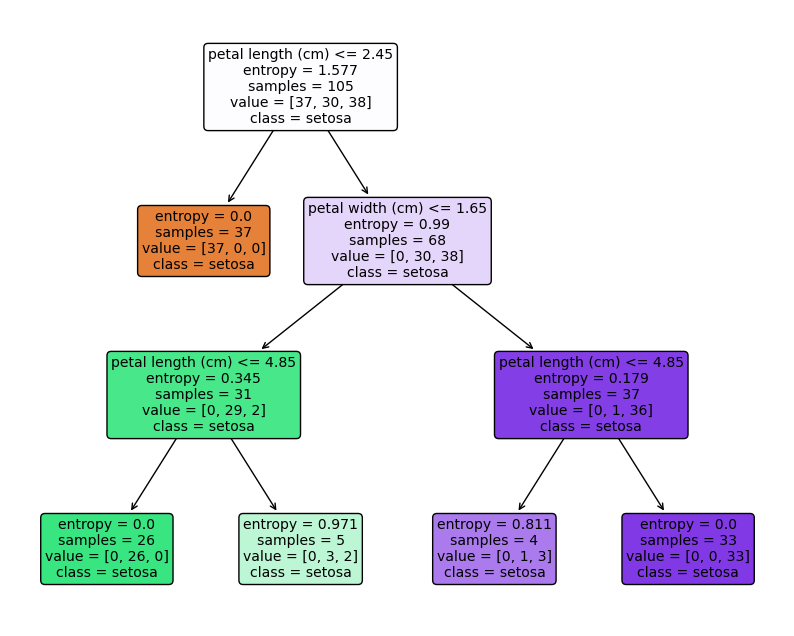

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9428571428571428


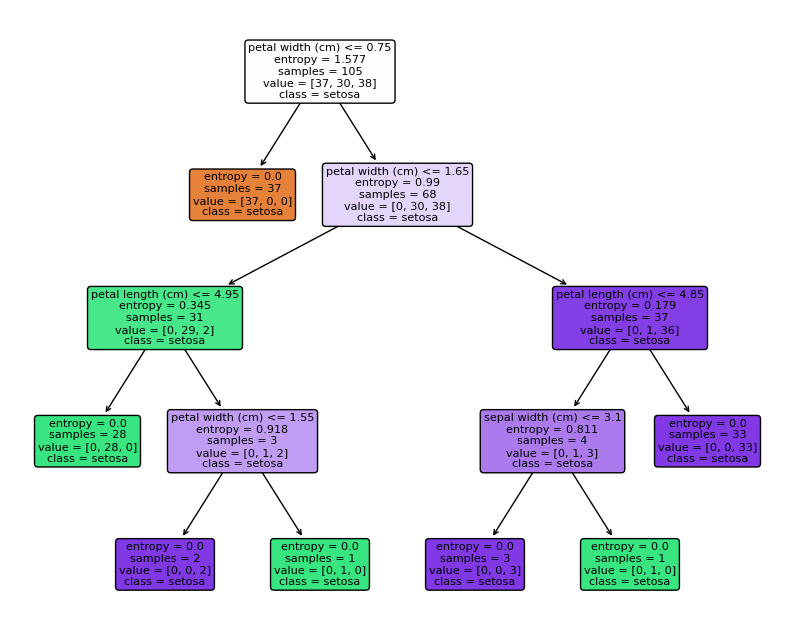

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


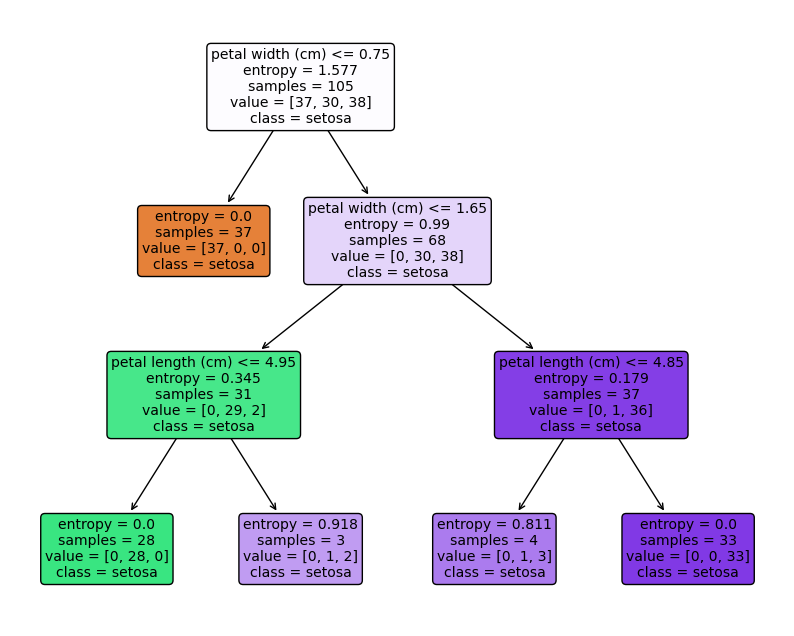

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


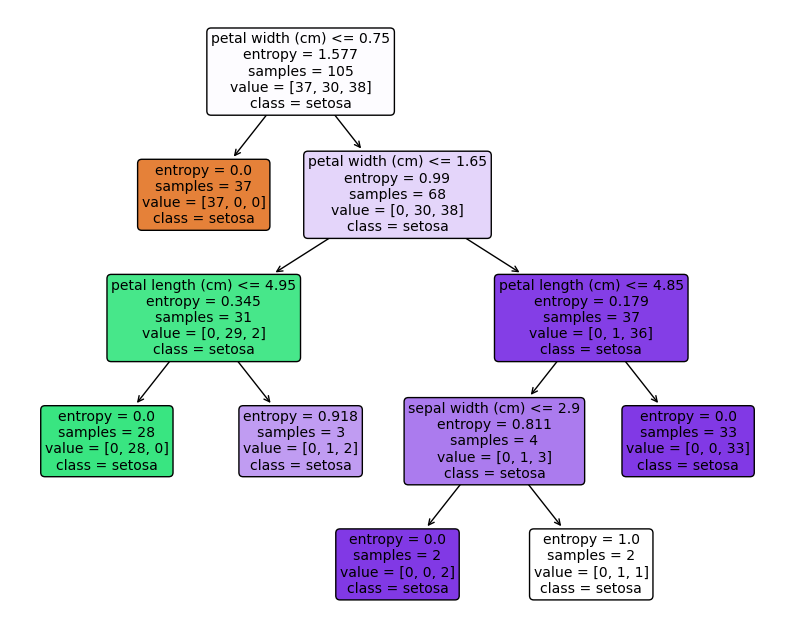

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


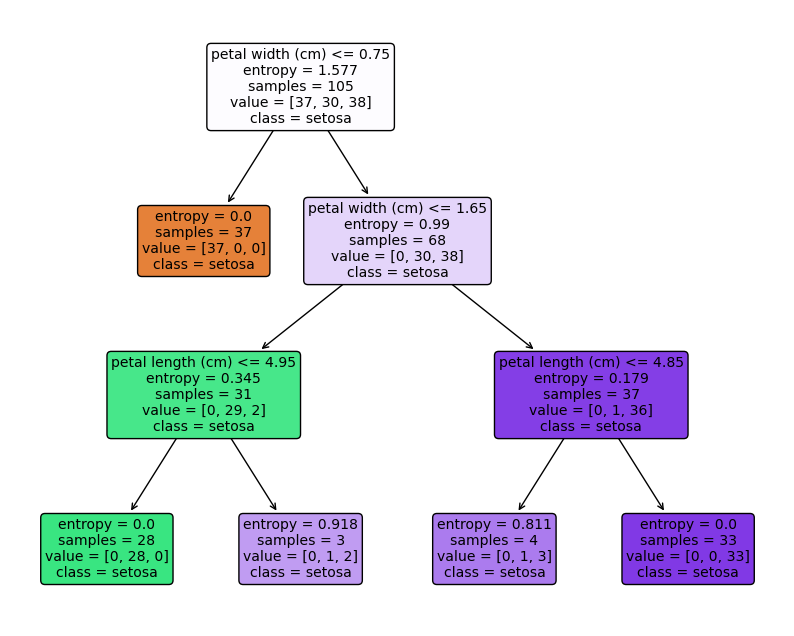

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


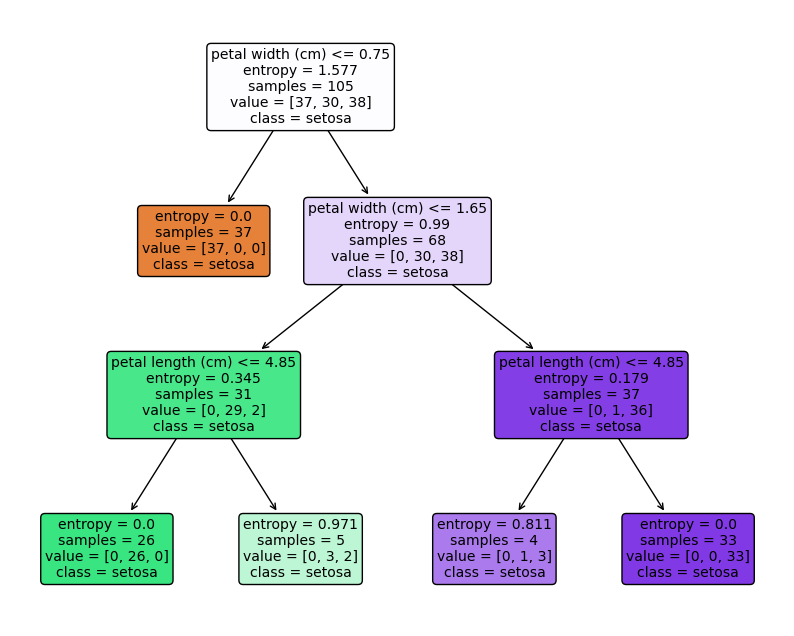

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


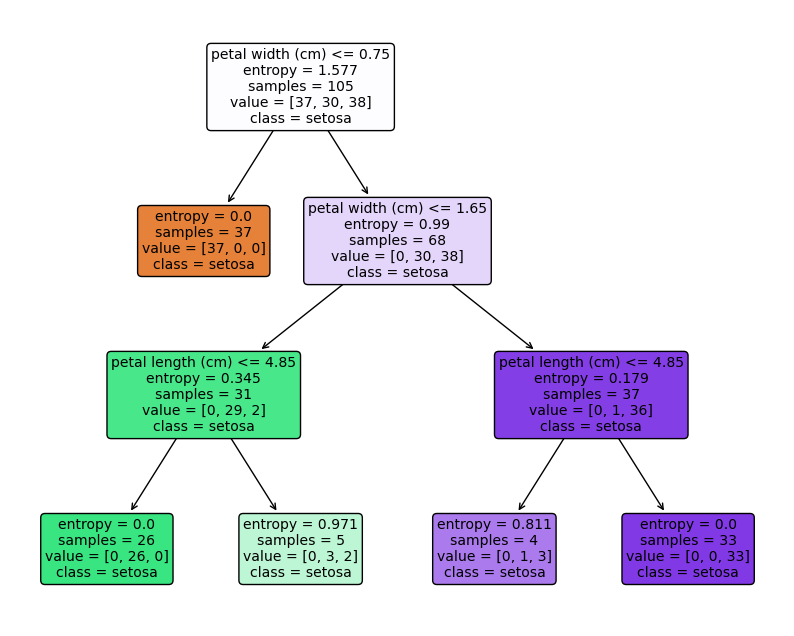

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


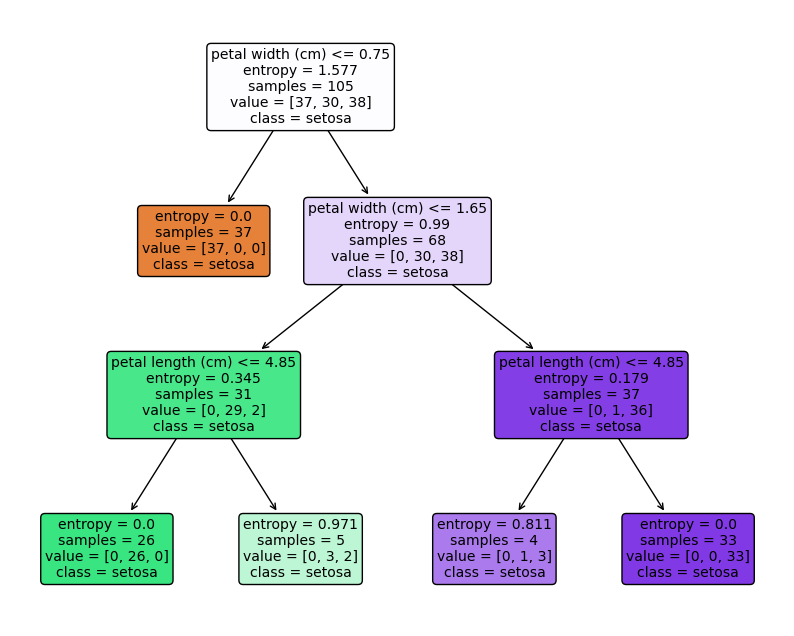

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


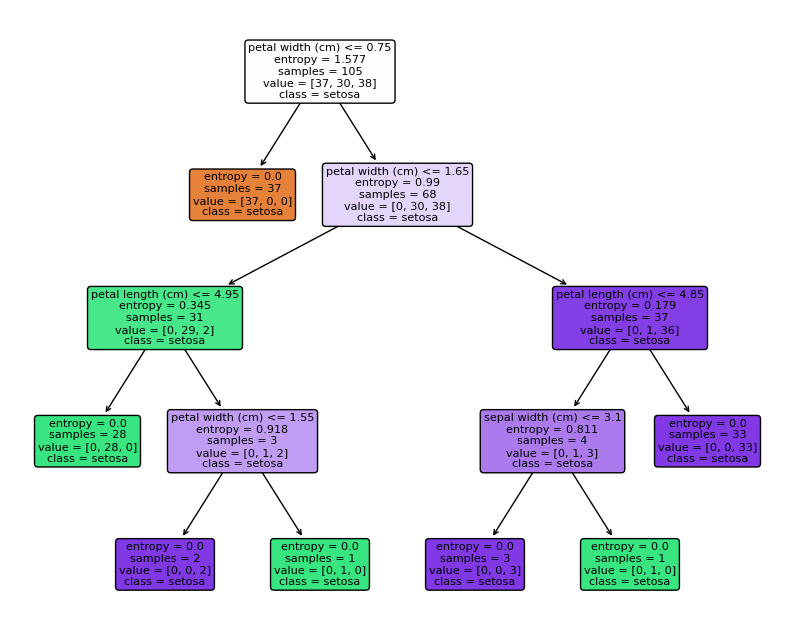

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


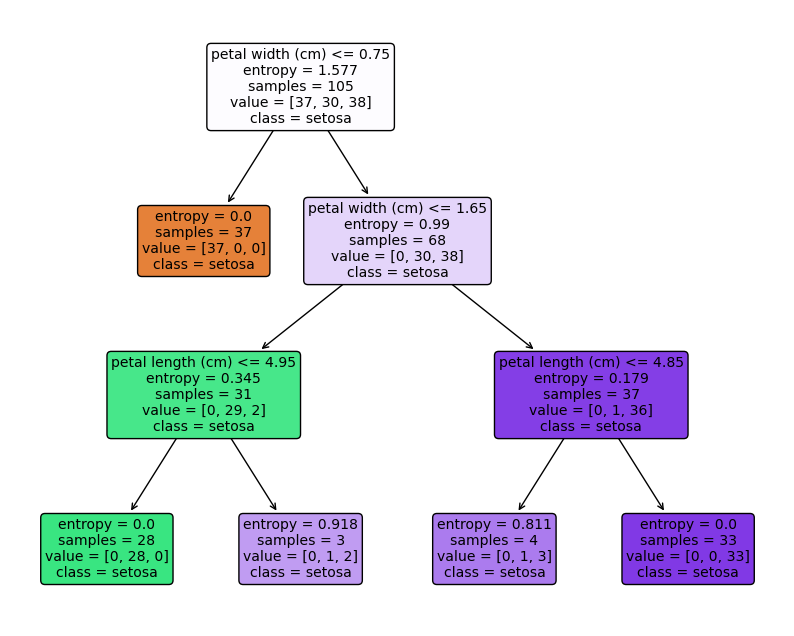

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


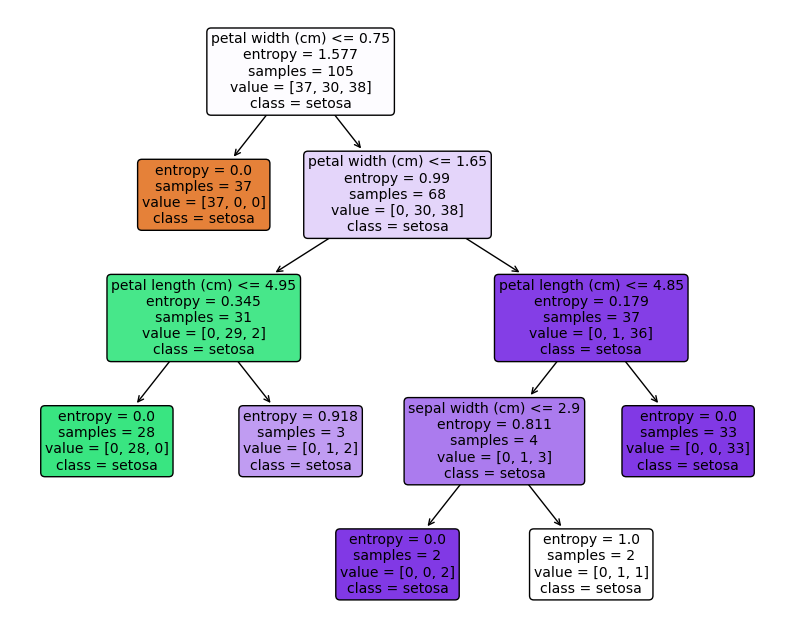

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


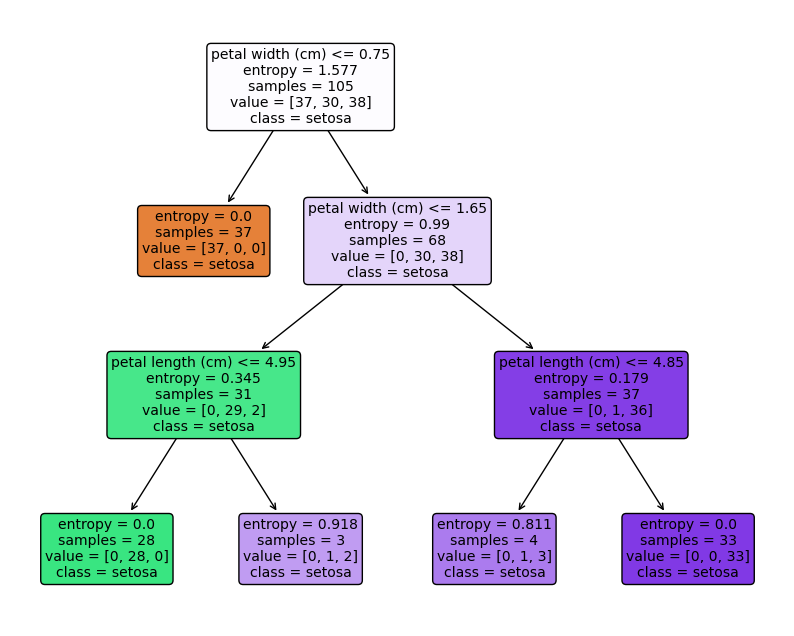

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


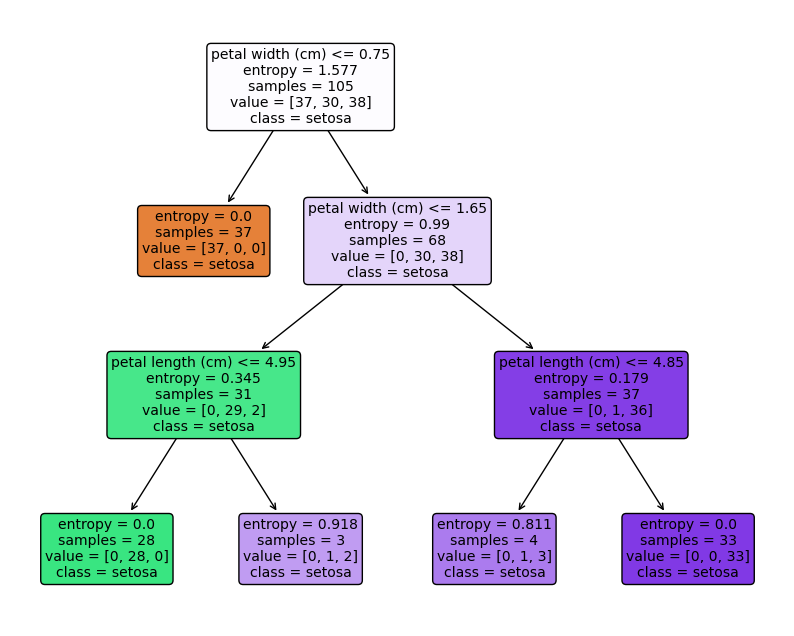

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


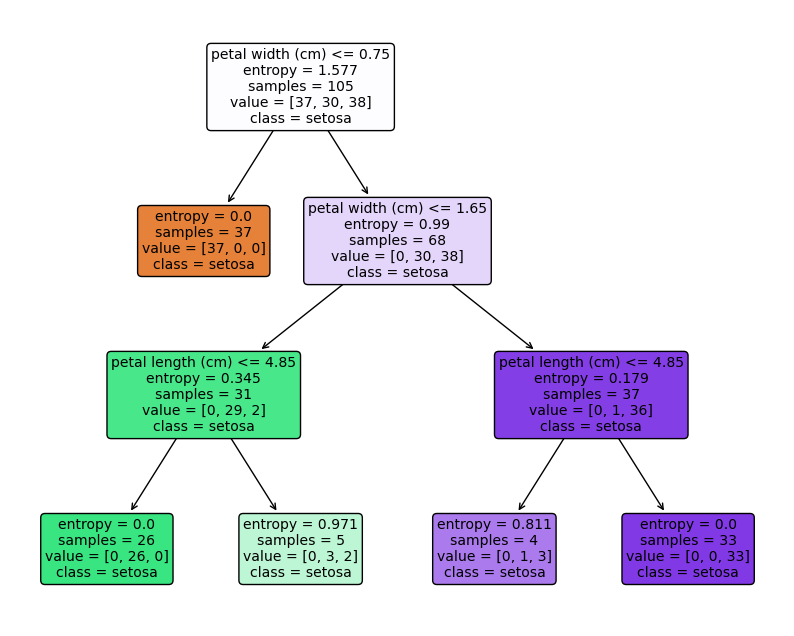

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


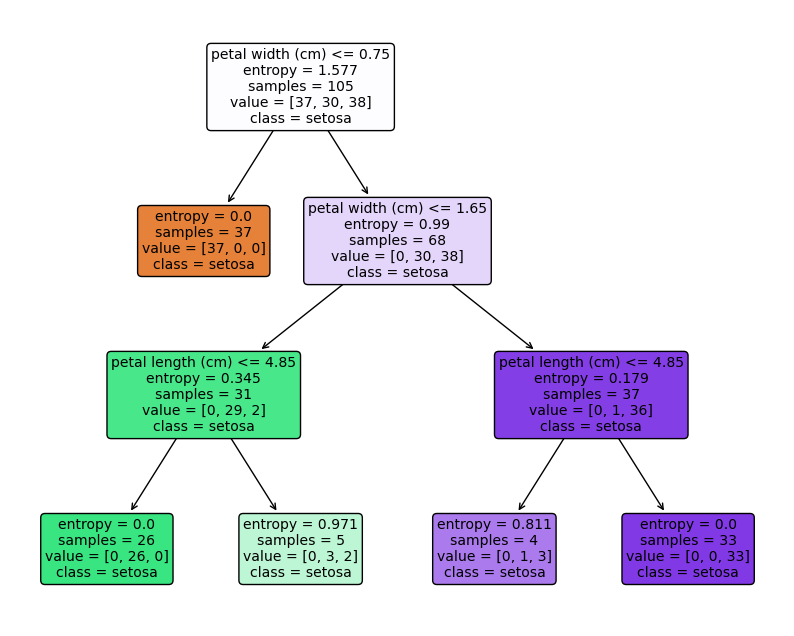

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


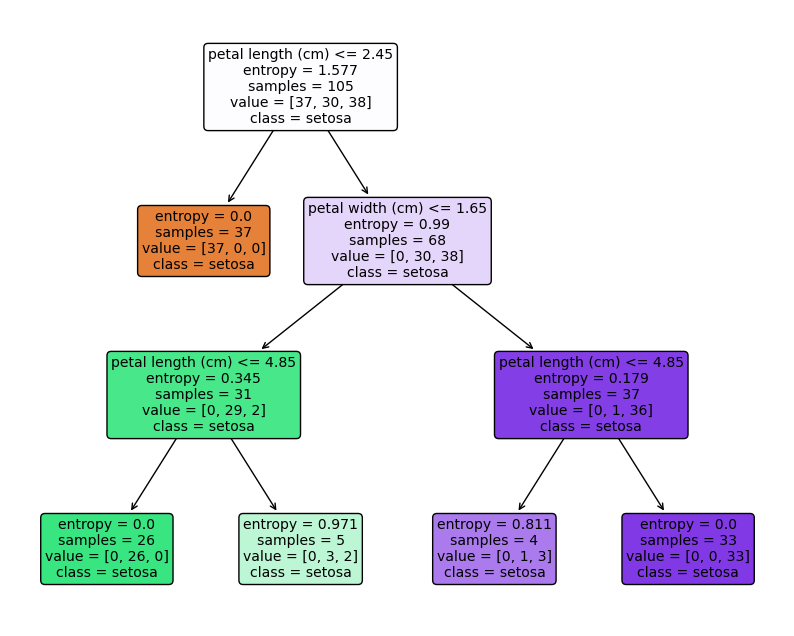

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


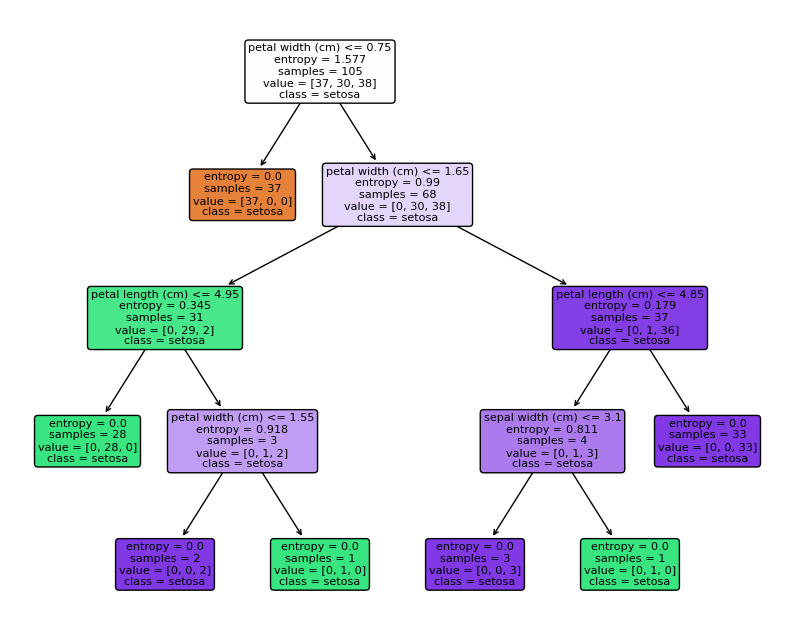

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


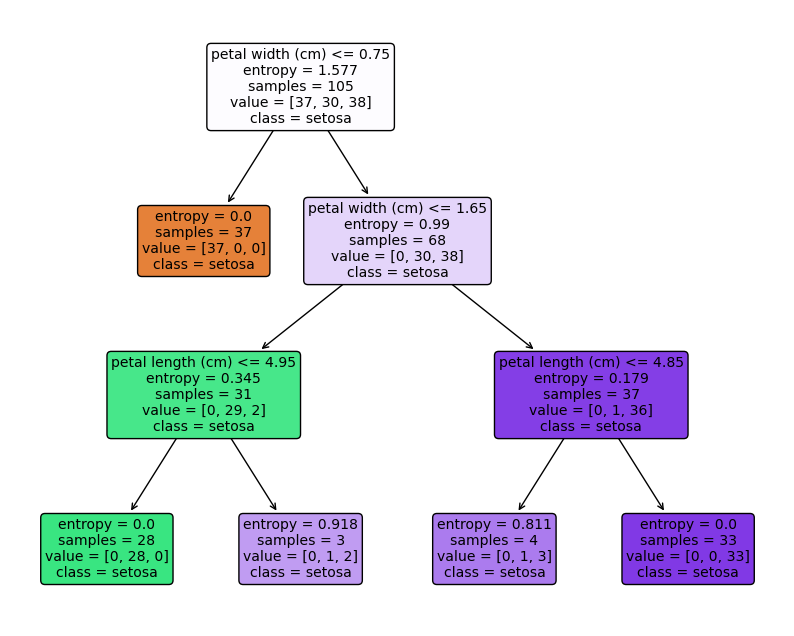

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


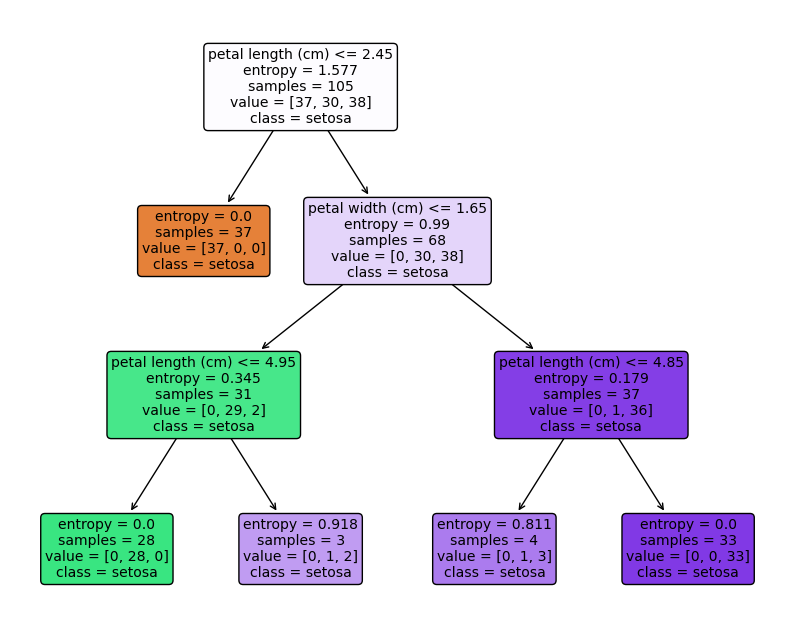

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


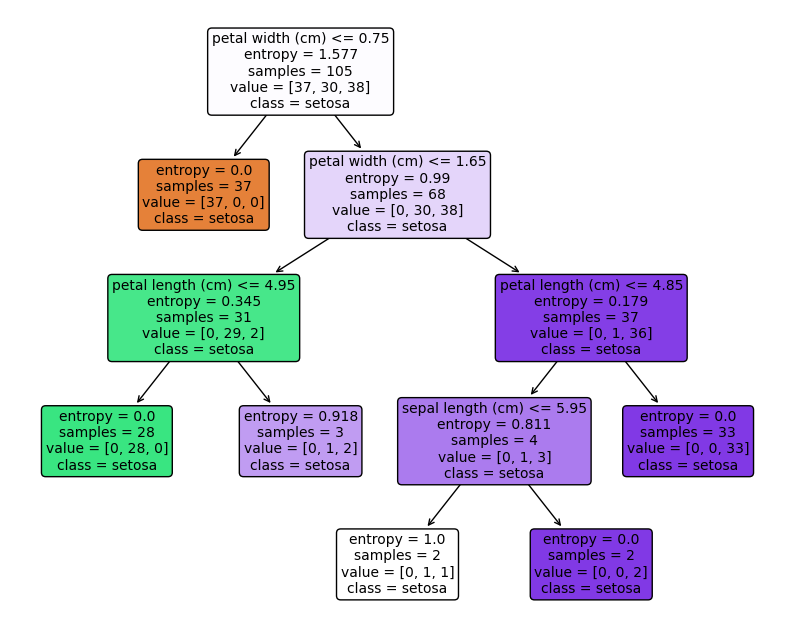

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


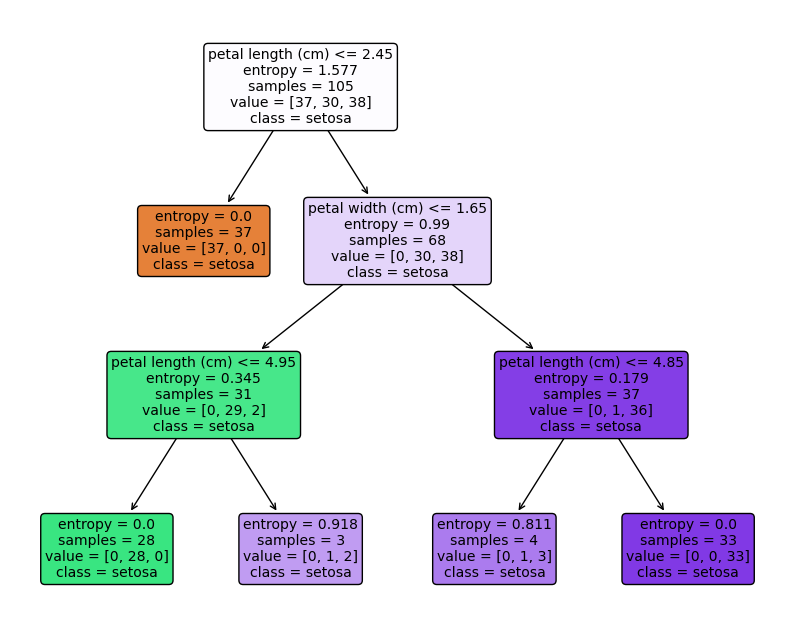

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


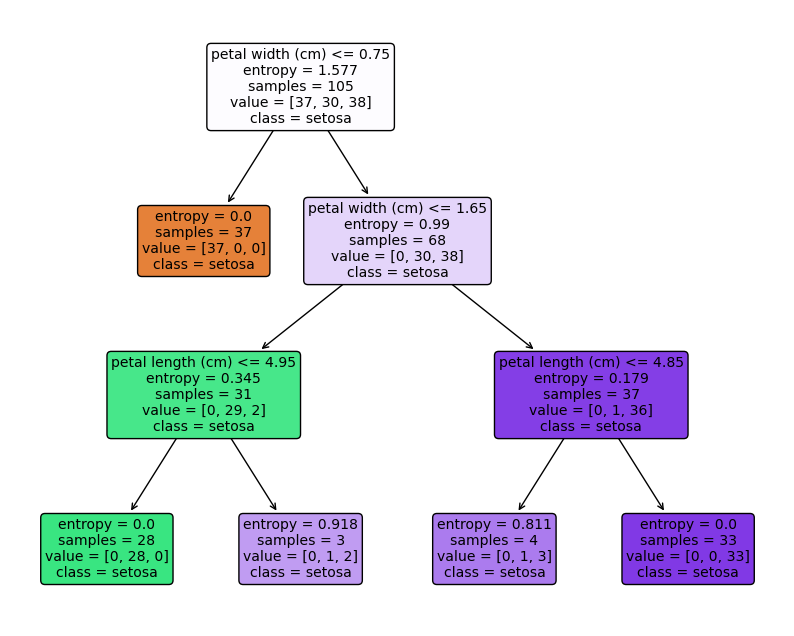

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


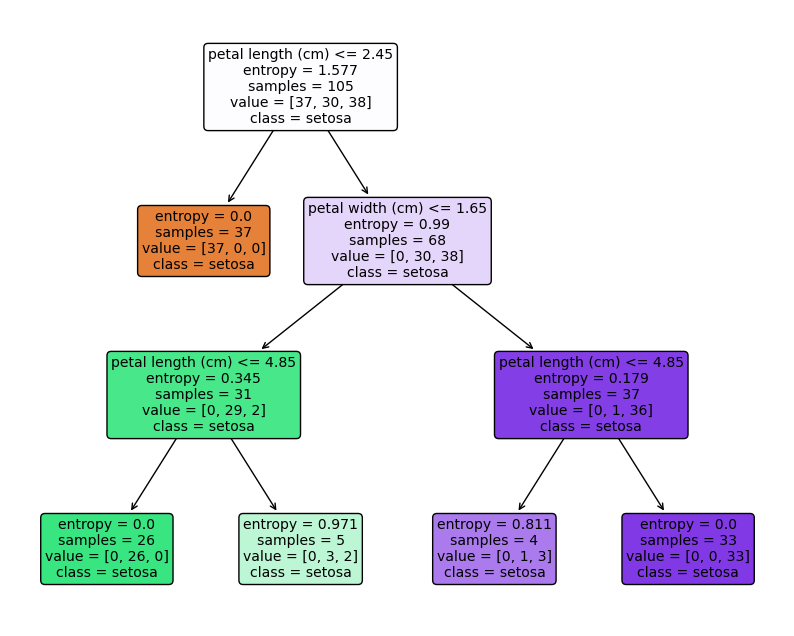

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9714285714285715


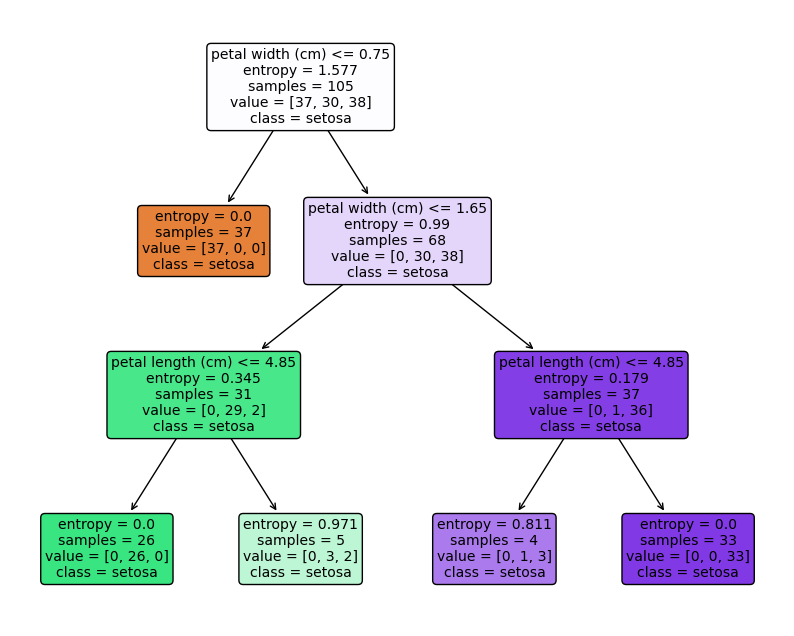

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}
----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.9523809523809523


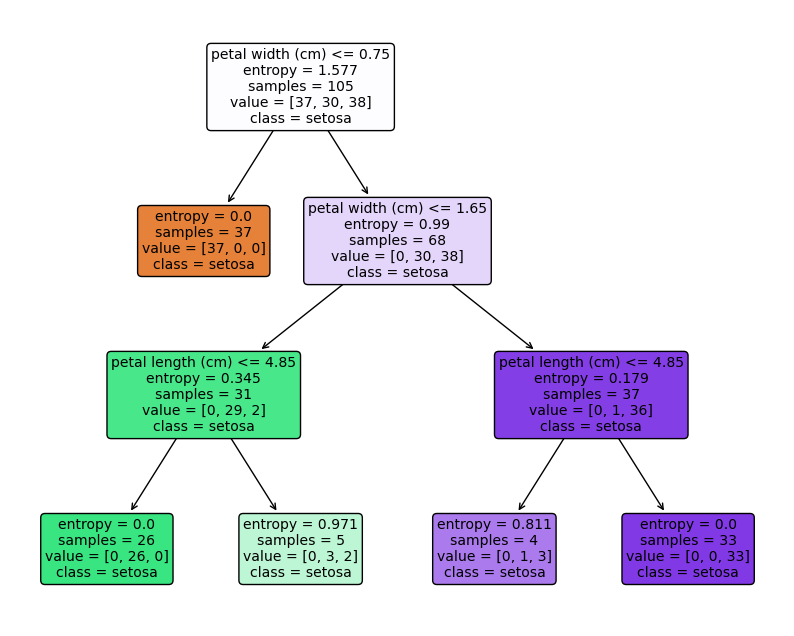

Current Hyperparameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------------------------------------------------------------
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.9714285714285715


In [26]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = grid_search.cv_results_
param_keys = [key for key in results.keys() if key.startswith('param_')]

# Visualize the decision tree for every combination of hyperparameters
for i in range(len(results['params'])):
    param_values = [results[key][i] for key in param_keys]
    param_string = ', '.join(f"{key[6:]}={value}" for key, value in zip(param_keys, param_values))
    
    # Create and fit the classifier with the current hyperparameters
    classifier = DecisionTreeClassifier(**results['params'][i])
    classifier.fit(X_train, y_train)
    
    accuracy_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    mean_accuracy = accuracy_scores.mean()
    print("Mean Accuracy: ", mean_accuracy)
    
    # Visualize the decision tree
    plt.figure(figsize=(10, 8))
    plt.title(f"Decision Tree - {param_string}")
    plot_tree(classifier, feature_names=df.columns, class_names=df.flower_name, filled=True, rounded=True)
    plt.show()
    
    print("Current Hyperparameters:")
    print(results['params'][i])
    print("-"*100)
    
    
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Generating the "best-model" using the best_params.

In [27]:
model = DecisionTreeClassifier(**grid_search.best_params_)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [30]:
#

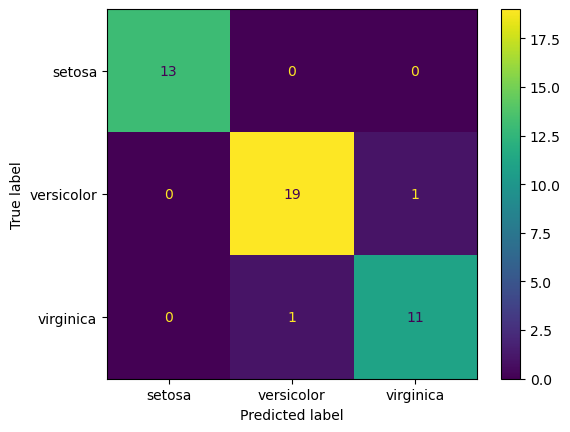

In [31]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

## Generating the results:
##    (1). The Best Score.
##    (2). The Confusion Matrix,
##    (3). The Decision Tree - obtained as a result of training the algorithm with the configuration of the 'best_params'.


In [32]:
def report_model(model):
    model_preds = model.predict(X_test)
    print("Best Score: ", grid_search.best_score_)
    print(classification_report(y_test, model_preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    print()
    
    plt.figure(figsize = (12, 8), dpi = 200)
    plot_tree(model, feature_names = X.columns, filled = True)
    plt.show()


Best Score:  0.9714285714285715
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45




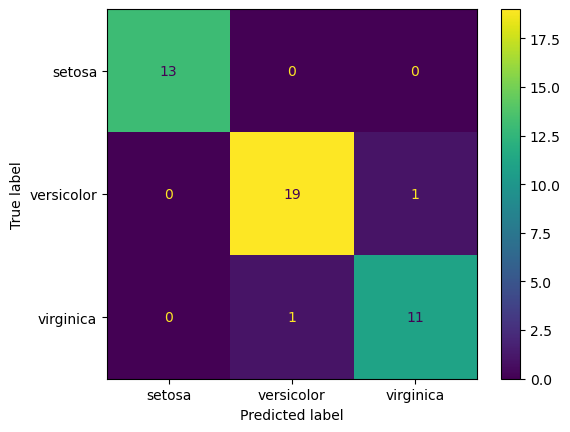

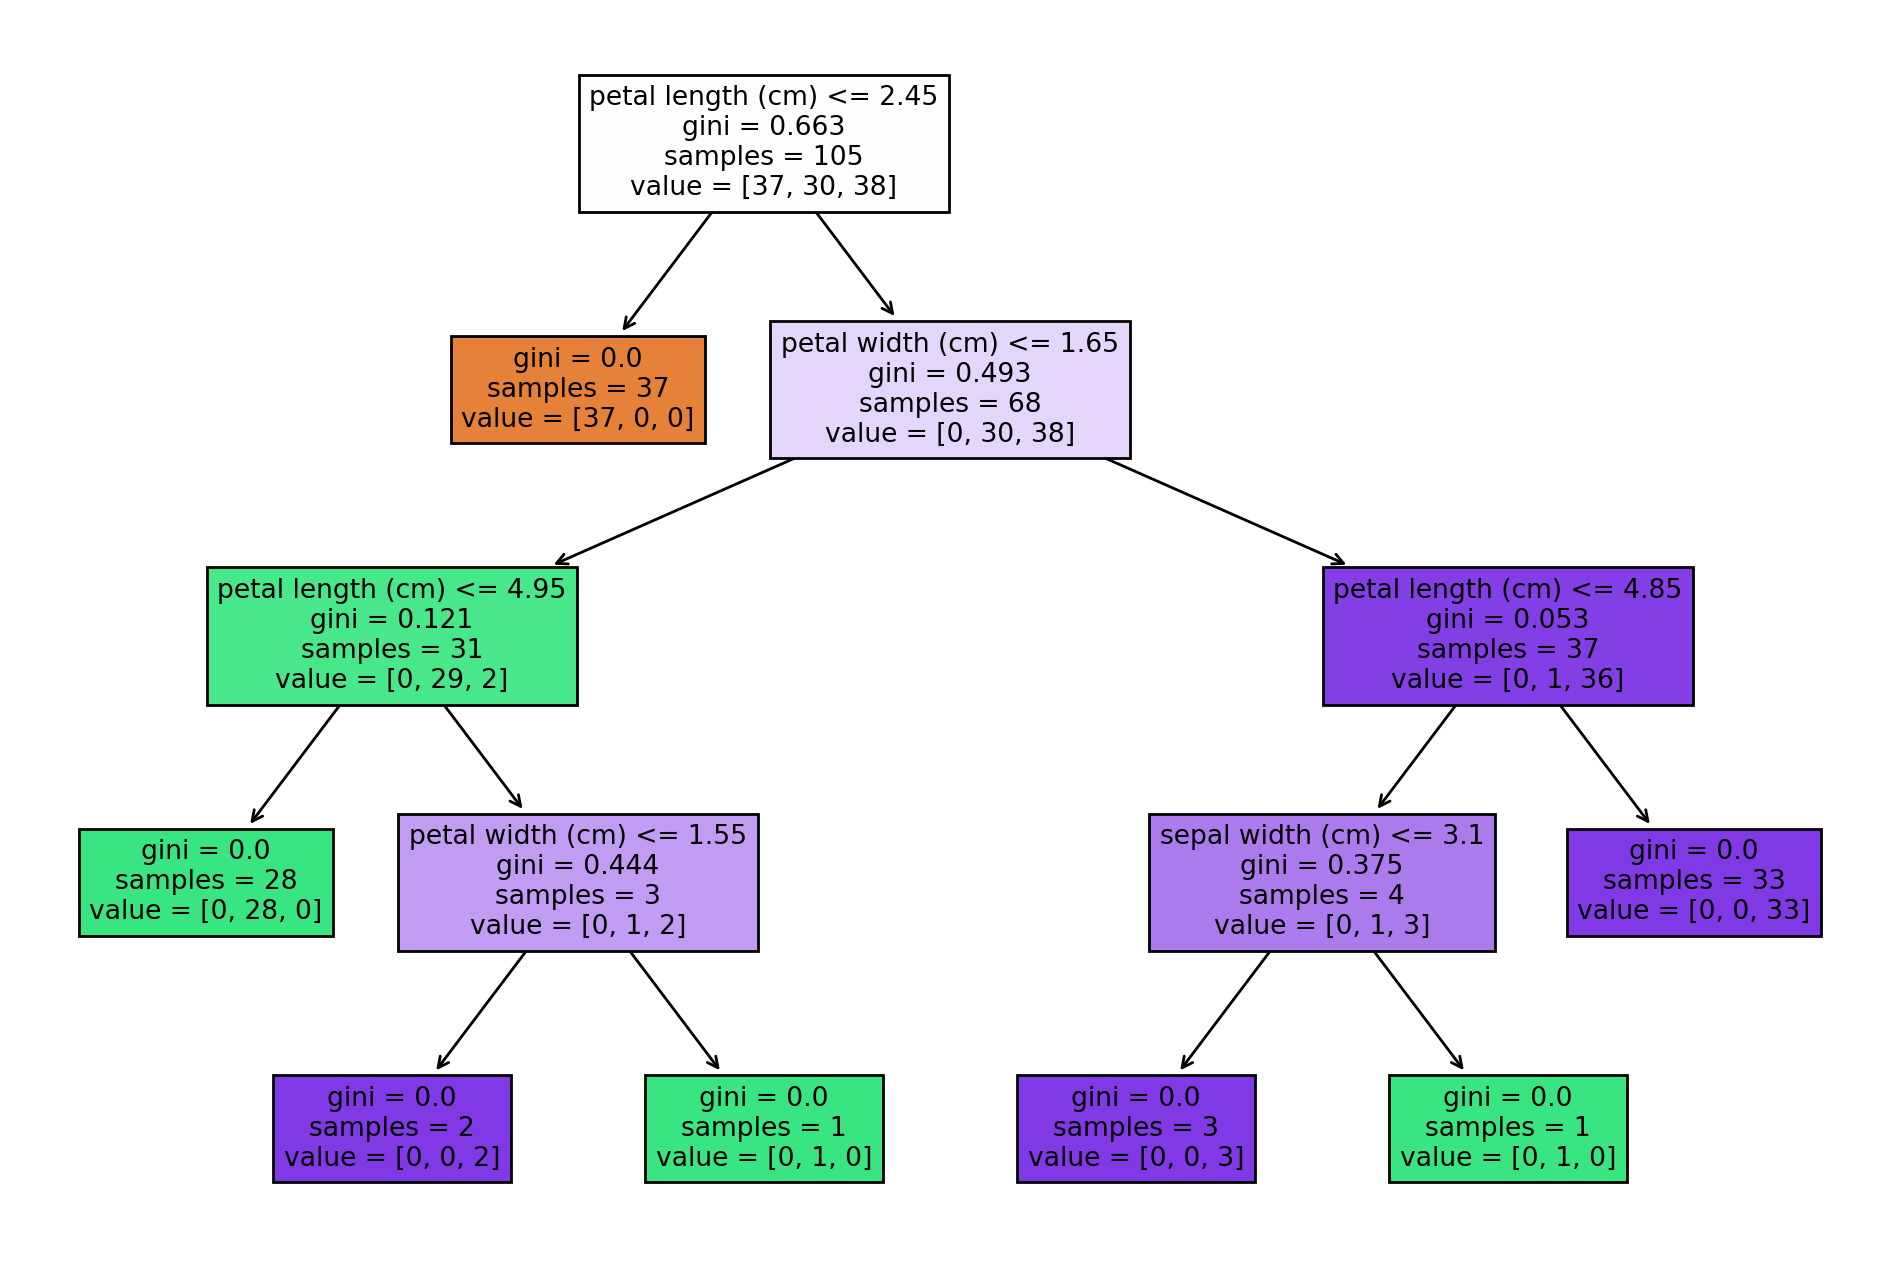

In [33]:
report_model(model)

# Thank you ! 